# TTS TEKNIK OPTIMALISASI GILANG AGUNG SAPUTRA 672019229

# 1. GENETIC ALGORITHM DAN DIFFERENTIAL EVOLUTION DENGAN SPHERE FUNCTION

## DIFFERENTIAL EVOLUTION DENGAN SPHERE FUNCTION

[[-9.56537886  0.30341511 -5.13048612  5.91347095 -9.90720902 -1.54020729
   3.18227683  2.52685235  1.81727413 -9.96013013]
 [-5.79042031  0.51790565 -1.43890747  7.85287398  8.7510288   5.83273048
   0.21950289 -9.37669703 -1.40362689  2.69181666]
 [-8.05249047  2.59889534  7.68560684  3.45016152 -2.37992998  1.63484556
  -6.67821344 -8.61525196 -9.14794517 -8.95645192]
 [-2.13218138  4.51697252 -6.79785949 -7.84323534  8.77128274 -5.6474211
   7.0857073  -3.61445009 -6.76620504 -5.74251333]
 [-7.3620016   3.21283036 -2.80495236 -6.02598703  4.79804588 -9.82882867
   9.14513922 -7.28025107  4.64428747 -0.58490827]
 [-2.92810467  9.58785794 -0.5700222   1.12714391  6.69696998  9.08099088
   4.87143153 -2.6181974   5.04748954 -2.11079681]
 [ 5.15510942  8.87159569  7.70813973 -6.70636638  8.47423179 -5.5539521
  -5.00047443  7.31955101 -6.68359958 -4.86509214]
 [-2.14823793 -2.37731754  8.40548919  7.651593    8.049577    5.77112672
   8.16938077 -6.26142122  1.81845094 -3.80448626]
 [

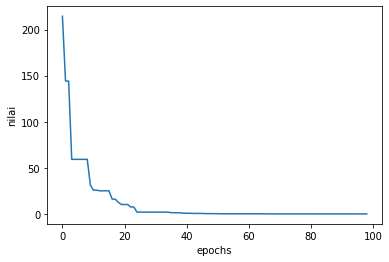

In [42]:
# DIFFERENTIAL EVOLUTION ALGORITHM DENGAN SPHERE FUNCTION#

import numpy as np
import random
import matplotlib.pyplot as plt

#INISIALISASI PARAMETER
D = 10 # D = ukuran dimensi
epochs = 99
ukuranPopulasi = 10 # N = populasi /ukuranPopulasi
BU = 10 #boundary high (UB)
BL = -10 #boundary low (LB)
CR = 0.9 #crossover, makin besar nilai maka kemungkinan crossover lebih tinggi
F = 0.5

#INISIALISASI POPULASI

induk = np.empty([ukuranPopulasi,D])
for i in range(ukuranPopulasi):
    for j in range(D):
        induk[i][j] = random.random()*(BU-BL)+BL
print(induk)


#FUNGSI SPHERE  
def hasilSphere(induk):
    matrix = induk.shape
    ukuranPopulasi = matrix[0]
    jumlahIndividu = matrix[1]

    Fobj = np.empty(ukuranPopulasi)

    for i in range(ukuranPopulasi):
        d = 0
        for j in range(jumlahIndividu):
            d += induk[i][j]**2
        Fobj[i] = d
    return Fobj

print(hasilSphere(induk))


#CROSSOVER
def crossover(induk,hasilSphere, j):
    matrix = induk.shape
    ukuranPopulasi = matrix[0]
    jumlahIndividu = matrix[1]

    random1 = random.randint(0,ukuranPopulasi-1)
    random2 = random.randint(0,ukuranPopulasi-1)
    random3 = random.randint(0,ukuranPopulasi-1)

    while random1 == random2:
        random2 = (random2+1)%ukuranPopulasi

    while random3 == random1 or random3 == random2:
        random3 = (random3+1)%ukuranPopulasi

    hasilCrossover = induk[random3][j] + F*(induk[random1][j] - induk[random2][j])
    return hasilCrossover

hasilCrossover = crossover(induk,hasilSphere, 1)
print(hasilCrossover)

print("induk awal: \n", induk)
print("hasil sphere: \n", hasilSphere(induk))
print("hasil crossover: \n", hasilCrossover)

x = np.empty((1, D))
objektif = hasilSphere(induk)
sphereTerbaik = np.empty(epochs)
sphereTerbaik[0] = objektif.min()
for loop in range(epochs):
    for i in range(ukuranPopulasi):
        for j in range(D):
            x[0][j] = induk[i][j]

        jrand = random.randint(0,D)
        for j in range(D):
            if random.random() < CR or j == jrand:
                crossbaru = crossover(induk, F, j)
                x[0][j] = crossbaru

        #replace
        objx = hasilSphere(x)
        if objx < objektif[i]:
            objektif[i] = objx
            for j in range(D):
                induk[i][j] = x[0][j]
    sphereTerbaik[loop] = objektif.min()
    print("nilai iterasi ke-", loop+1, ": ", sphereTerbaik[loop])
print(sphereTerbaik)

#PLOT
plt.plot(sphereTerbaik)
plt.xlabel('epochs')
plt.ylabel('nilai')
plt.show()

## GENETIC ALGORITHM DENGAN SPHERE FUNCTION

[[ 7.55150994 -2.84627425 -9.96746959  9.72849812 -0.04215876  0.72847216
   4.22215789 -6.77434913 -2.21998424  5.59507089]
 [ 6.89177737  0.08159578 -7.38096719 -3.02689219  2.71406093 -0.43920333
  -3.7906722   9.71175774  8.21348859  9.14784488]
 [-7.34481261 -7.77790124 -0.07140175  7.01141425 -1.35402717  4.80085743
   5.61442241 -0.99943589 -6.56475295 -5.0250218 ]
 [-8.86390477 -2.47661379 -0.67080594  4.1455582   8.10494805  3.19001612
   3.46942127 -0.52753223 -8.67152679  9.51303865]
 [ 4.45732858  5.47259121 -4.64568983 -2.01899688  8.50502796 -2.62588706
  -3.92149028  1.97875253 -7.26348229 -7.52758248]
 [-2.49848765  1.43252803  5.35062274 -9.04882986  5.27858343 -9.9956836
   4.20503037  9.36620135  4.34762578 -5.93573309]
 [-2.21246785  9.6089421   4.34828639 -0.14150656  1.86845919 -5.09045588
   1.5508768  -1.12025901 -5.27506842 -9.27719811]
 [-2.34632106  4.69845054 -5.37992485 -4.39310814  6.76729125  2.0448108
  -6.96443766  1.12586811 -8.52954544  7.10989568]
 [

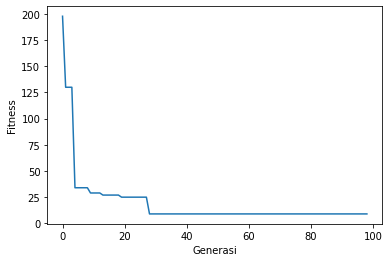

In [39]:
#                    GENETIC ALGORITHM WITH SPHERE FUNCTION             #

import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from array import *

#INISIALISASI PARAMETER
D=10 #dimensi permasalahan
maxit=99
ukuranPopulasi=10
LB= -10
UB= 10
F=  0.5
CR = 0.9

def initPopulasi(ukuranPopulasi,D,UB,LB):
  P=np.empty((ukuranPopulasi,D))
  for i in range(ukuranPopulasi):
    for j in range(D):
      P[i][j]=(random.random()*(UB-LB))+LB
  return P

P= initPopulasi(ukuranPopulasi,D,UB,LB)
print(P)

#sphere
def fungsiObjektif(populasi):
  sz=populasi.shape
  ukuranPopulasi=sz[0]
  dimensi=sz[1]
  Fobj=np.empty(ukuranPopulasi)

  for i in range(ukuranPopulasi):
    d=0
    for j in range(dimensi):
      d+=populasi[i][j]**2
    Fobj[i]=d
  return Fobj
Fobj = fungsiObjektif(P)
print(Fobj)

#seleksi
def seleksi (P,fsObj):
  jmlInduk = 10
  sz = P.shape
  ukuranPopulasi = sz[0]
  dimensi = sz[1]
  Induk = np.empty((jmlInduk,dimensi))
  Induk = Induk.astype('int')
  
  for i in range (10):
    # memilih dua individu secara acak 
    r1 = random.randint(0,ukuranPopulasi-1)
    r2 = random.randint(0,ukuranPopulasi-1)
    
    if  fsObj[r1] < fsObj [r2]:
      for j in range(dimensi):
        Induk [i][j] = P[r1][j]
    else:
      for j in range(dimensi):
        Induk [i][j] = P[r2][j]
  return Induk
Induk = seleksi(P,Fobj)
print(Induk)

#crossover 
def PMX(Induk):
  sz = Induk.shape
  brs = sz[0]
  kol = sz[1]
  
  Anak = np.empty((2,kol))
  Anak = Anak.astype('int')
  r1 = random.randint(1,kol-2)
  for i0 in range(r1): 
    Anak [0][i0] = Induk[0][i0]
    Anak [1][i0] = Induk[1][i0]

  batasCek1 = r1
  batasCek2 = r1
  for i in range(kol):
    m = (i+r1)%kol
    n1 = Induk[0][i] 
    n2 = Induk[1][i]

    #mengecek apakah kota tertentu sudah ada di anak
    idxAda1 = 0
    idxAda2 = 0
    for j1 in range(batasCek1): 
      if batasCek1>(kol-1):
        idxAda1 = 1
      if Anak [0][j1] ==n2: 
        idxAda1 = 1
            
    for j2 in range(batasCek2): 
      if batasCek2>(kol-1):
        idxAda2 = 1
      if Anak [1][i0]  == n1: 
        idxAda2 = 1

    if idxAda1 == 0:
      Anak[0][batasCek1] = n2
      batasCek1 = batasCek1 +1
    if idxAda2 == 0:
      Anak[1][batasCek2] = n1
      batasCek2 = batasCek2 +1
  return Anak

AnakCX = PMX(Induk)
print("Anak :",AnakCX)

#mutasi swap
def MutasiSwap(Induk):
  sz = Induk.shape
  brs = sz[0]
  kol = sz[1]
  Anak = np.empty((2,kol))
  Anak = Anak.astype('int')
  Anak = Induk

  r1 = random.randint(0,kol-1)
  r2 = random.randint(0,kol-1)

  while r1 == r2:
    r2 = random.randint(0,kol-1)

  I1rs1 = Induk [0][r1]
  I1rs2 = Induk [0][r2]
  I2rs1 = Induk [1][r1]
  I2rs2 = Induk [1][r2] 
  Anak [0][r1] = I1rs2
  Anak [0][r2] = I1rs1
  Anak [1][r1] = I2rs2  
  Anak [1][r2] = I2rs1
  return Anak

print("AnakCX :",AnakCX)
AnakM = MutasiSwap(AnakCX)
print("AnakM :",AnakM)


#etilism
def Elitism(P,Anak,Fobj,fitAnak):
  szP = P.shape
  brsP = szP[0]
  kolP = szP[1]
  szA = Anak.shape
  brsA = szA[0]
  kolA = szA[1]

  for i in range(brsA):
    iJelek = Fobj.max()
    idxJelek = Fobj.argmax()
    if fitAnak[i]<iJelek:
      Fobj[idxJelek] = fitAnak[i]
      for j in range (kolP):
        P[idxJelek][j] = Anak[i][j]
  return [P,Fobj]

fitAnak= fungsiObjektif(AnakM)
print(P)
print(AnakM)
print(Fobj)
print(fitAnak)
P = Elitism (P,AnakM,Fobj,fitAnak)
print(P)
print(Fobj)

#inisialisasi parameter
PCX = 0.9
Pm = 0.01

# Inisialisasi populasi 
P = initPopulasi(ukuranPopulasi,D,UB,LB)
#melakukan evaluasi P
Fobj = fungsiObjektif(P)
print("fitness populasi awal:",Fobj)
print("fitness terbaik awal:",Fobj.min())
print("rute awal :",P[Fobj.argmin()])
listFitnessTerbaik = []
for i in range(maxit):
  print("generasi :",i)
  Induk = seleksi(P,Fobj)
  print("Induk :",Induk)
  Anak = Induk
  rxo = random.random()
  if rxo < PCX:
    Anak = PMX(Induk)
    rm = random.random()
    if rm < Pm:
      Anak = MutasiSwap(Anak)
  fitAnak = fungsiObjektif(Anak)
  print("fitness Anak ke-:",i, "=",fitAnak)
  [P, Fobj]= Elitism (P,Anak,Fobj,fitAnak)   
  listFitnessTerbaik.append(Fobj.min())
  
print("fitness populasi akhir:",Fobj)
print("fitness akhir:",Fobj.min())
print("rute akhir :",P[Fobj.argmin()])
print("list fitness terbaik:",listFitnessTerbaik)


plt.plot(listFitnessTerbaik)
plt.xlabel('Generasi')
plt.ylabel('Fitness')
plt.show()

## GRAFIK PERBANDINGAN DIFFERENTIAL EVOLUTION DENGAN GENETIC ALGORITHM DENGAN SPHERE FUNCTION

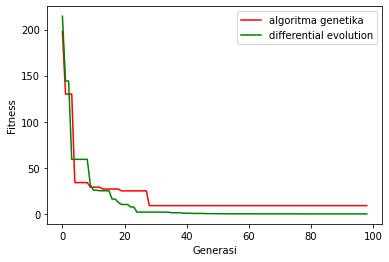

In [43]:
#menggabungkan plot sphere dan listFitnessTerbaik, plot sphere berwarna merah dan listFitnessTerbaik berwarna hijau, dengan label sphere dan listFitnessTerbaik
plt.plot(listFitnessTerbaik,color='red',label='algoritma genetika')
plt.plot(sphereTerbaik,color='green',label='differential evolution')
plt.xlabel('Generasi')
plt.ylabel('Fitness')
plt.legend()

## MENCARI MEAN, STDEV, MIN DARI 30X RUN DIFFERENTIAL EVOLUTION DENGAN SPHERE FUNCTION

In [34]:
#mencari mean, stdev, min  # DIFFERENTIAL EVOLUTION ALGORITHM DENGAN SPHERE FUNCTION#
#run 30 kali
# DIFFERENTIAL EVOLUTION ALGORITHM DENGAN SPHERE FUNCTION#

import numpy as np
import random
import matplotlib.pyplot as plt
jumlahRun = 30

#INISIALISASI PARAMETER
D = 10 # D = ukuran dimensi
epochs = 99
ukuranPopulasi = 10 # N = populasi /ukuranPopulasi
BU = 10 #boundary high (UB)
BL = -10 #boundary low (LB)
CR = 0.9 #crossover, makin besar nilai maka kemungkinan crossover lebih tinggi
F = 0.5
listsphereterbaik = []
for a in range(jumlahRun):

    #INISIALISASI POPULASI
    induk = np.empty([ukuranPopulasi,D])
    for i in range(ukuranPopulasi):
        for j in range(D):
            induk[i][j] = random.random()*(BU-BL)+BL
    print(induk)

    #FUNGSI SPHERE  
    def hasilSphere(induk):
        matrix = induk.shape
        ukuranPopulasi = matrix[0]
        jumlahIndividu = matrix[1]
        Fobj = np.empty(ukuranPopulasi)

        for i in range(ukuranPopulasi):
            d = 0
            for j in range(jumlahIndividu):
                d += induk[i][j]**2
            Fobj[i] = d
        return Fobj
    print(hasilSphere(induk))

    #CROSSOVER
    def crossover(induk,hasilSphere, j):
        matrix = induk.shape
        ukuranPopulasi = matrix[0]
        jumlahIndividu = matrix[1]

        random1 = random.randint(0,ukuranPopulasi-1)
        random2 = random.randint(0,ukuranPopulasi-1)
        random3 = random.randint(0,ukuranPopulasi-1)

        while random1 == random2:
            random2 = (random2+1)%ukuranPopulasi

        while random3 == random1 or random3 == random2:
            random3 = (random3+1)%ukuranPopulasi

        hasilCrossover = induk[random3][j] + F*(induk[random1][j] - induk[random2][j])
        return hasilCrossover

    hasilCrossover = crossover(induk,hasilSphere, 1)
    print(hasilCrossover)
    print("induk awal: \n", induk)
    print("hasil sphere: \n", hasilSphere(induk))
    print("hasil crossover: \n", hasilCrossover)

    x = np.empty((1, D))
    objektif = hasilSphere(induk)
    sphereTerbaik = np.empty(epochs)
    sphereTerbaik[0] = objektif.min()
    for loop in range(epochs):
        for i in range(ukuranPopulasi):
            for j in range(D):
                x[0][j] = induk[i][j]

            jrand = random.randint(0,D)

            for j in range(D):
                if random.random() < CR or j == jrand:
                    crossbaru = crossover(induk, F, j)
                    x[0][j] = crossbaru

            #replace
            objx = hasilSphere(x)
            if objx < objektif[i]:
                objektif[i] = objx
                for j in range(D):
                    induk[i][j] = x[0][j]

        sphereTerbaik = objektif.min()
        #print("nilai iterasi ke-", loop+1, ": ", sphereTerbaik[loop])
    print("run ke-:",a)
    print("sphere terbaik ke ", a)
    print(sphereTerbaik)
    listsphereterbaik.append(sphereTerbaik)

print(listsphereterbaik)

[[ 6.69123806  9.40774106  1.04323178  3.5061626  -9.71662448 -1.22854164
   7.54698822 -4.09315391 -9.61068694  3.0719796 ]
 [ 4.05875864  6.58119274  1.78168247 -9.97211038 -5.21997471 -0.01845998
   1.57693872 -8.16627029 -3.03877613 -9.86137453]
 [-2.200578   -6.05789577 -0.65153805  8.08731173 -8.31205814 -1.27273541
   4.68663954 -1.36439599 -7.4374023   1.29234865]
 [-8.47868549  3.36535178 -3.32901626  0.71558826 -8.03227196  5.12125199
  -9.38789213  4.68899329 -9.34025817 -2.62792504]
 [ 8.78699226 -4.79411708  8.18533697  4.52372805  6.53762687  5.65141454
  -2.38999826  1.65401167  7.81035401  4.42544948]
 [-2.74993005 -0.89110776 -2.70083705  8.16317686  7.00227804  8.31253824
   5.59168494 -3.51713894  5.29971139 -8.27131365]
 [ 5.57025873  3.4104341  -0.24114002  3.04732611  0.24243388  7.39694582
  -5.83346701 -7.9183057   7.74842496 -8.63721434]
 [ 6.84209282 -2.70644221 -8.66508195  7.03956987  1.28174621 -0.74637128
   1.10025683  8.23541527  8.56052199  1.53655834]


## HASIL DARI 30X RUN DIFFERENTIAL EVOLUTION DENGAN SPHERE FUNCTION

In [35]:
print("30 kali run -DIFFERENTIAL EVOLUTION ALGORITHM DENGAN SPHERE FUNCTION-")
#membuat looping sejumlah list sphere terbaik
for i in range(len(listsphereterbaik)):
    print(i+1, ".   :", listsphereterbaik[i])

#mencari mean dari list sphere terbaik
mean = np.mean(listsphereterbaik, axis=0)
print("mean DE sphere function:", mean)

#mencari stdev dari list sphere terbaik
stdev = np.std(listsphereterbaik, axis=0)
print("stdev DE sphere function:", stdev)

#mencari min dari list sphere terbaik
min = np.min(listsphereterbaik, axis=0)
print("min DE sphere function:", min)

30 kali run -DIFFERENTIAL EVOLUTION ALGORITHM DENGAN SPHERE FUNCTION-
1 .   : 0.00022664417822374655
2 .   : 0.001954422982816817
3 .   : 0.4339433414982277
4 .   : 0.0002451212420121066
5 .   : 0.001035994190115679
6 .   : 0.005930886688422762
7 .   : 0.15698853970101553
8 .   : 0.0020231091558358815
9 .   : 0.0010358161913166864
10 .   : 0.010621520356327718
11 .   : 0.00040897433288978355
12 .   : 0.0019926375675249687
13 .   : 0.00040566416120546583
14 .   : 0.0005867784036262772
15 .   : 0.0040590125144218
16 .   : 0.00030725832551842025
17 .   : 0.010155612948829202
18 .   : 0.0002379220316951061
19 .   : 0.0004359874461809296
20 .   : 0.0035406426628908413
21 .   : 0.004768480859358389
22 .   : 0.06008674744443945
23 .   : 0.0007207589901566144
24 .   : 0.0049263826760793245
25 .   : 0.0003387289655326687
26 .   : 0.001718543533879137
27 .   : 0.0007214621076063344
28 .   : 0.0018600505945307552
29 .   : 0.0013490761931944026
30 .   : 0.00753976952760906
mean DE sphere function:

## MENCARI MEAN, STDEV, MIN DARI 30X RUN GENETIC ALGORITHM DENGAN SPHERE FUNCTION

In [3]:
#mencari mean, stdev, min    #GENETIC ALGORITHM WITH SPHERE FUNCTION#
#run 30 kali
#                    GENETIC ALGORITHM WITH SPHERE FUNCTION             #

import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from array import *

#INISIALISASI PARAMETER
D=10 #dimensi permasalahan
maxit=99
ukuranPopulasi=10
LB= -10
UB= 10
F=  0.5
CR = 0.9
listFitJmlRun = []
jumlahRun = 30

for a in range(jumlahRun):
      def initPopulasi(ukuranPopulasi,D,UB,LB):
        P=np.empty((ukuranPopulasi,D))
        for i in range(ukuranPopulasi):
          for j in range(D):
            P[i][j]=(random.random()*(UB-LB))+LB
        return P

      P= initPopulasi(ukuranPopulasi,D,UB,LB)
      print(P)

      #sphere
      def fungsiObjektif(populasi):
        sz=populasi.shape
        ukuranPopulasi=sz[0]
        dimensi=sz[1]
        Fobj=np.empty(ukuranPopulasi)

        for i in range(ukuranPopulasi):
          d=0
          for j in range(dimensi):
            d+=populasi[i][j]**2
          Fobj[i]=d
        return Fobj
      Fobj = fungsiObjektif(P)
      print(Fobj)

      #seleksi
      def seleksi (P,fsObj):
        jmlInduk = 10
        sz = P.shape
        ukuranPopulasi = sz[0]
        dimensi = sz[1]

        Induk = np.empty((jmlInduk,dimensi))
        Induk = Induk.astype('int')
        
        for i in range (10):
          # memilih dua individu secara acak 
          r1 = random.randint(0,ukuranPopulasi-1)
          r2 = random.randint(0,ukuranPopulasi-1)
          
          if  fsObj[r1] < fsObj [r2]:
            for j in range(dimensi):
              Induk [i][j] = P[r1][j]
          else:
            for j in range(dimensi):
              Induk [i][j] = P[r2][j]
        return Induk
      Induk = seleksi(P,Fobj)
      print(Induk)

      #crossover 
      def PMX(Induk):
        sz = Induk.shape
        brs = sz[0]
        kol = sz[1]

        Anak = np.empty((2,kol))
        Anak = Anak.astype('int')

        r1 = random.randint(1,kol-2)
        for i0 in range(r1): 

          Anak [0][i0] = Induk[0][i0]
          Anak [1][i0] = Induk[1][i0]
          

        batasCek1 = r1
        batasCek2 = r1

        for i in range(kol):
          m = (i+r1)%kol
          n1 = Induk[0][i] 
          n2 = Induk[1][i]

          #mengecek apakah kota tertentu sudah ada di anak
          idxAda1 = 0
          idxAda2 = 0
          for j1 in range(batasCek1): 
            if batasCek1>(kol-1):
              idxAda1 = 1

            if Anak [0][j1] ==n2: 
              idxAda1 = 1
                  
          for j2 in range(batasCek2): 
            if batasCek2>(kol-1):
              idxAda2 = 1

            if Anak [1][i0]  == n1: 
              idxAda2 = 1

          if idxAda1 == 0:
            Anak[0][batasCek1] = n2
            batasCek1 = batasCek1 +1
        
          if idxAda2 == 0:
            Anak[1][batasCek2] = n1
            batasCek2 = batasCek2 +1
        
        return Anak

      AnakCX = PMX(Induk)
      print("Anak :",AnakCX)

      #mutasi swap
      def MutasiSwap(Induk):
        sz = Induk.shape
        brs = sz[0]
        kol = sz[1]

        Anak = np.empty((2,kol))
        Anak = Anak.astype('int')
        Anak = Induk

        r1 = random.randint(0,kol-1)
        r2 = random.randint(0,kol-1)

        while r1 == r2:
          r2 = random.randint(0,kol-1)

        I1rs1 = Induk [0][r1]
        I1rs2 = Induk [0][r2]
        I2rs1 = Induk [1][r1]
        I2rs2 = Induk [1][r2] 

        Anak [0][r1] = I1rs2
        Anak [0][r2] = I1rs1
        Anak [1][r1] = I2rs2  
        Anak [1][r2] = I2rs1

        return Anak

      print("AnakCX :",AnakCX)
      AnakM = MutasiSwap(AnakCX)
      print("AnakM :",AnakM)


      #etilism
      def Elitism(P,Anak,Fobj,fitAnak):
        szP = P.shape
        brsP = szP[0]
        kolP = szP[1]
        szA = Anak.shape
        brsA = szA[0]
        kolA = szA[1]

        #print (fitP)
        for i in range(brsA):
          iJelek = Fobj.max()
          idxJelek = Fobj.argmax()

          if fitAnak[i]<iJelek:
            Fobj[idxJelek] = fitAnak[i]
            for j in range (kolP):
              P[idxJelek][j] = Anak[i][j]

        return [P,Fobj]

      fitAnak= fungsiObjektif(AnakM)
      print(P)
      print(AnakM)
      print(Fobj)
      print(fitAnak)
      P = Elitism (P,AnakM,Fobj,fitAnak)
      print(P)
      print(Fobj)

      #inisialisasi parameter
      PCX = 0.9
      Pm = 0.01

      # Inisialisasi populasi 
      P = initPopulasi(ukuranPopulasi,D,UB,LB)
      
      #melakukan evaluasi P
      Fobj = fungsiObjektif(P)
      print("fitness populasi awal:",Fobj)
      print("fitness terbaik awal:",Fobj.min())
      print("rute awal :",P[Fobj.argmin()])
      listFitnessTerbaik = []

      for i in range(maxit):
        print("generasi :",i)
        Induk = seleksi(P,Fobj)
        print("Induk :",Induk)

        Anak = Induk
        rxo = random.random()

        if rxo < PCX:
          Anak = PMX(Induk)

          rm = random.random()
          if rm < Pm:
            Anak = MutasiSwap(Anak)
        
        fitAnak = fungsiObjektif(Anak)
        print("fitness Anak ke-:",i, "=",fitAnak)

        [P, Fobj]= Elitism (P,Anak,Fobj,fitAnak)   
        listFitnessTerbaik.append(Fobj.min())
        
      print("fitness populasi akhir:",Fobj)
      print("fitness akhir:",Fobj.min())
      print("rute akhir :",P[Fobj.argmin()])
      print("list fitness terbaik:",listFitnessTerbaik)
      listFitJmlRun.append(np.min(listFitnessTerbaik))

print("list fitness jumlah run:",listFitJmlRun)


[[-7.50138620e+00 -6.49788797e+00 -3.61105771e+00  9.33882545e+00
   7.15948872e+00  6.77329527e-04 -5.35622671e+00 -8.11364550e+00
  -4.41607944e+00  2.78997037e+00]
 [ 3.05160130e+00 -1.28918246e+00 -8.36759279e+00  8.72735479e+00
   7.45966483e+00  1.97163539e+00  1.13534860e-01  9.49564732e+00
   2.59855475e+00  4.15397347e-01]
 [ 3.48864875e+00  1.86949760e+00 -4.58214647e+00 -3.56983415e+00
  -7.60077308e+00  2.26108156e+00  8.63657720e+00  5.71218413e+00
   1.10939780e+00  7.42045941e+00]
 [-9.93047376e-01 -4.22299735e-01  1.56319265e+00 -8.93377793e+00
  -8.61488229e-01  3.69844446e-02 -3.24898147e+00  8.56649121e+00
  -5.91813318e+00 -3.29677247e+00]
 [-9.52199454e+00 -1.92302507e+00  9.66968392e+00 -5.31174364e+00
   5.66718883e+00 -7.67879665e+00 -3.96788746e+00 -7.35041098e+00
   5.21410122e-01 -2.62370988e+00]
 [ 6.82724694e+00 -1.73045113e+00  6.18792500e+00  9.35821272e+00
  -2.54318522e+00  4.80215495e+00  2.36859722e+00 -2.36507366e+00
   2.97173740e+00  8.14065543e-02

## HASIL DARI 30X RUN GENETIC ALGORITHM DENGAN SPHERE FUNCTION

In [4]:
print("30 kali run -GENETIC ALGORITHM DENGAN SPHERE FUNCTION-")
#membuat looping sejumlah list sphere terbaik
for i in range(len(listFitJmlRun)):
    print(i+1, ".   :", listFitJmlRun[i])

#mencari mean dari list sphere terbaik
mean = np.mean(listFitJmlRun, axis=0)
print("mean GA sphere function:", mean)

#mencari stdev dari list sphere terbaik
stdev = np.std(listFitJmlRun, axis=0)
print("stdev GA sphere function:", stdev)

#mencari min dari list sphere terbaik
min = np.min(listFitJmlRun, axis=0)
print("min GA sphere function:", min)

30 kali run -GENETIC ALGORITHM DENGAN SPHERE FUNCTION-
1 .   : 18.0
2 .   : 45.0
3 .   : 62.0
4 .   : 127.0
5 .   : 73.0
6 .   : 84.0
7 .   : 36.0
8 .   : 99.0
9 .   : 62.0
10 .   : 105.0
11 .   : 85.0
12 .   : 86.0
13 .   : 50.0
14 .   : 87.0
15 .   : 163.0
16 .   : 46.0
17 .   : 16.0
18 .   : 170.0
19 .   : 106.0
20 .   : 145.0
21 .   : 67.0
22 .   : 143.0
23 .   : 71.0
24 .   : 38.0
25 .   : 76.0
26 .   : 19.0
27 .   : 84.0
28 .   : 123.0
29 .   : 13.0
30 .   : 18.0
mean GA sphere function: 77.23333333333333
stdev GA sphere function: 43.49458459266957
min GA sphere function: 13.0


===============AKHIR DARI GENETIC ALGORITM DAN DIFFERENTIAL EVOLUTION DENGAN SPHERE FUNCTION=========================

# 2. GENETIC ALGORITHM DAN DIFFERENTIAL EVOLUTION DENGAN SCHEWEL'S FUNCTION 2.22



## DIFFERENTIAL EVOLUTION DENGAN SCHEWEL'S FUNCTION 2.22

INDUK AWAL SEKALI ADALAH: [[-5.05348126  8.79072802  6.69169693 -7.78535058 -0.3743702   6.40602304
   8.14889846 -7.67422314  5.21676539  2.56126136]
 [-3.99130073  6.43309843  8.62032621  7.55161666 -4.14070047 -1.23653011
  -8.51733602  2.35683917  4.91443898  5.56820027]
 [-7.62072604 -6.06597651  1.81380299 -2.01441317  3.08653605 -5.49086585
   6.21731465  3.86725554  1.51859994  6.12614709]
 [-9.84589557  6.90693946 -0.16891112  3.98796876 -7.44401257  3.31504913
   6.16547626 -0.03382381  5.91156597  7.83835148]
 [ 6.6912924   3.40120185 -3.58656925  8.5620546  -9.20007428  9.97592595
  -6.81705061 -6.33360573  0.32210669  4.22015344]
 [ 8.57455553  3.4528579   9.60738805  7.77572862 -5.4627579   5.59973462
   1.52744952  3.72694866  8.02037014  3.62044445]
 [-3.99875126  1.2363178   4.16916646  1.03542278  0.4760821  -7.38606932
  -6.94766751  6.41178284 -8.82838847 -1.35815705]
 [-4.56228989  2.04402049 -9.03733647  6.6730167   1.24352401  7.42562886
  -0.24723945 -5.63302794

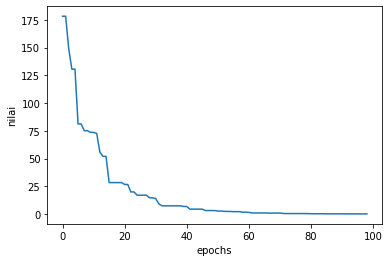

In [7]:
#             DIFFERENTIAL EVOLUTION DENGAN SCHEWEL'S FUNCTION
# DIFFERENTIAL EVOLUTION ALGORITHM DENGAN SCHEWEL'S FUNCTION#

import numpy as np
import random
import matplotlib.pyplot as plt

#INISIALISASI PARAMETER
D = 10 # D = ukuran dimensi
epochs = 99
ukuranPopulasi = 10 # N = populasi /ukuranPopulasi
BU = 10 #boundary high (UB)
BL = -10 #boundary low (LB)
CR = 0.9 #crossover, makin besar nilai maka kemungkinan crossover lebih tinggi
F = 0.5

#INISIALISASI POPULASI
induk = np.empty([ukuranPopulasi,D])
for i in range(ukuranPopulasi):
    for j in range(D):
        induk[i][j] = random.random()*(BU-BL)+BL
print("INDUK AWAL SEKALI ADALAH:",induk)

#FUNGSI OBJEKTIF  
def fungsiObjektif(induk):
    matrix = induk.shape
    ukuranPopulasi = matrix[0]
    jumlahIndividu = matrix[1]
    Fobj = np.empty(ukuranPopulasi)
    for i in range(ukuranPopulasi):
        d1=0
        d2=0
        d = 0
        for j in range(jumlahIndividu):  
            d1 += abs(induk[i][j])
            d2 *= abs(induk[i][j])
            d += d1 + d2
        Fobj[i] = d
    return Fobj
print(fungsiObjektif(induk))

#CROSSOVER
def crossover(induk,fungsiObjektif, j):
    matrix = induk.shape
    ukuranPopulasi = matrix[0]
    jumlahIndividu = matrix[1]
    random1 = random.randint(0,ukuranPopulasi-1)
    random2 = random.randint(0,ukuranPopulasi-1)
    random3 = random.randint(0,ukuranPopulasi-1)
    while random1 == random2:
        random2 = (random2+1)%ukuranPopulasi
    while random3 == random1 or random3 == random2:
        random3 = (random3+1)%ukuranPopulasi
    hasilCrossover = induk[random3][j] + F*(induk[random1][j] - induk[random2][j])
    return hasilCrossover
hasilCrossover = crossover(induk,fungsiObjektif, 1)
print(hasilCrossover)

print("induk awal: \n", induk)
print("hasil objektif: \n", fungsiObjektif(induk))
print("hasil crossover: \n", hasilCrossover)

x = np.empty((1, D))
objektif = fungsiObjektif(induk)
schewelTerbaik = np.empty(epochs)
schewelTerbaik[0] = objektif.min()
for loop in range(epochs):
    for i in range(ukuranPopulasi):
        for j in range(D):
            x[0][j] = induk[i][j]

        jrand = random.randint(0,D)
        for j in range(D):
            if random.random() < CR or j == jrand:
                crossbaru = crossover(induk, F, j)
                x[0][j] = crossbaru

        #replace
        objx = fungsiObjektif(x)
        if objx < objektif[i]:
            objektif[i] = objx
            for j in range(D):
                induk[i][j] = x[0][j]
    schewelTerbaik[loop] = objektif.min()
    print("nilai iterasi ke-", loop+1, ": ", schewelTerbaik[loop])
    
print(schewelTerbaik)

#PLOT
plt.plot(schewelTerbaik)
plt.xlabel('epochs')
plt.ylabel('nilai')
plt.show()

## GENETIC ALGORITHM DENGAN SCHEWEL'S FUNCTION 2.22

[[ 1.01861582 -6.00436287 -4.74100647 -8.48102435 -3.32933445  1.94267744
   9.87353663  6.9430731  -4.38399993 -7.57165387]
 [-2.09037743 -8.72307032  8.80024586  5.78624886  6.42804216 -2.80338266
  -8.41951314  9.66381685 -6.93825981 -6.05180968]
 [ 6.35729872 -4.6441175   8.13318481 -9.15872489 -1.85897349 -7.70851701
  -9.00508659 -5.13688423  4.11809354  9.62721708]
 [-1.21404265  5.57945541 -9.38415063 -0.62988803 -2.30700075 -9.15938978
   4.5430381   1.5098573   0.85616309 -8.96371935]
 [-0.74044789  0.66212086  2.39306112 -6.71841018  7.77415598 -9.52034449
   9.78813027 -2.20316258 -1.89322986 -1.84750817]
 [ 9.73601447  0.05598817  1.8744416   2.83587652  2.16362208 -5.83013872
  -6.18375443 -9.31123728  7.62358615 -9.77961788]
 [-2.77197676 -2.456853    2.54406684  0.57227533  6.00526885 -5.81603348
  -9.50874003  5.02762409 -7.5648874   3.78621614]
 [ 2.65290574  6.18212893 -6.17702709 -8.93874846 -7.65400634  3.73497531
  -3.79395905 -0.71289633  3.73107365 -5.51014095]


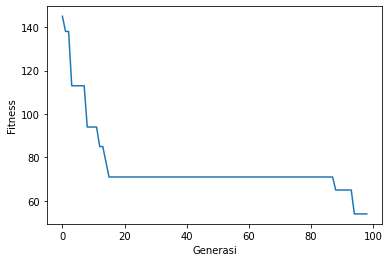

In [41]:
#                    GENETIC ALGORITHM DENGAN SCHEWEL'S FUNCTION             #
#                    GENETIC ALGORITHM WITH SCHEWEL'S FUNCTION             #

import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from array import *

#INISIALISASI PARAMETER
D=10
maxit=99
ukuranPopulasi=10
LB= -10
UB= 10
F=  0.5
CR = 0.9

#inisialisasi populasi
def initPopulasi(ukuranPopulasi,D,UB,LB):
  P=np.empty((ukuranPopulasi,D))
  for i in range(ukuranPopulasi):
    for j in range(D):
      P[i][j]=(random.random()*(UB-LB))+LB
  return P
P= initPopulasi(ukuranPopulasi,D,UB,LB)
print(P)

#objektif
def fungsiObjektif(populasi):
  sz=populasi.shape
  ukuranPopulasi=sz[0]
  dimensi=sz[1]
  Fobj=np.empty(ukuranPopulasi)
  for i in range(ukuranPopulasi):
    d1=0
    d2=0
    d=0
    for j in range(dimensi):
      d1 += abs(populasi[i][j])
      d2 *= abs(populasi[i][j])
      d += d1 + d2
    Fobj[i]=d
  return Fobj
Fobj = fungsiObjektif(P)
print(Fobj)

#seleksi
def seleksi (P,fsObj):
  jmlInduk = 10
  sz = P.shape
  ukuranPopulasi = sz[0]
  dimensi = sz[1]
  Induk = np.empty((jmlInduk,dimensi))
  Induk = Induk.astype('int')
  
  for i in range (10):
    # memilih dua individu secara acak 
    r1 = random.randint(0,ukuranPopulasi-1)
    r2 = random.randint(0,ukuranPopulasi-1)
    
    if  fsObj[r1] < fsObj [r2]:
      for j in range(dimensi):
        Induk [i][j] = P[r1][j]
    else:
      for j in range(dimensi):
        Induk [i][j] = P[r2][j]
  return Induk
Induk = seleksi(P,Fobj)
print(Induk)

#crossover 
def PMX(Induk):
  sz = Induk.shape
  brs = sz[0]
  kol = sz[1]
  Anak = np.empty((2,kol))
  Anak = Anak.astype('int')
  r1 = random.randint(1,kol-2)

  for i0 in range(r1): 
    Anak [0][i0] = Induk[0][i0]
    Anak [1][i0] = Induk[1][i0]
    
  batasCek1 = r1
  batasCek2 = r1

  for i in range(kol):
    m = (i+r1)%kol
    n1 = Induk[0][i] 
    n2 = Induk[1][i]

    #mengecek apakah kota tertentu sudah ada di anak
    idxAda1 = 0
    idxAda2 = 0
    for j1 in range(batasCek1): 
      if batasCek1>(kol-1):
        idxAda1 = 1
      if Anak [0][j1] ==n2: 
        idxAda1 = 1
            
    for j2 in range(batasCek2): 
      if batasCek2>(kol-1):
        idxAda2 = 1
      if Anak [1][i0]  == n1: 
        idxAda2 = 1

    if idxAda1 == 0:
      Anak[0][batasCek1] = n2
      batasCek1 = batasCek1 +1
   
    if idxAda2 == 0:
      Anak[1][batasCek2] = n1
      batasCek2 = batasCek2 +1 
  return Anak
AnakCX = PMX(Induk)
print("Anak :",AnakCX)

#mutasi swap
def MutasiSwap(Induk):
  sz = Induk.shape
  brs = sz[0]
  kol = sz[1]
  Anak = np.empty((2,kol))
  Anak = Anak.astype('int')
  Anak = Induk
  r1 = random.randint(0,kol-1)
  r2 = random.randint(0,kol-1)

  while r1 == r2:
    r2 = random.randint(0,kol-1)

  I1rs1 = Induk [0][r1]
  I1rs2 = Induk [0][r2]
  I2rs1 = Induk [1][r1]
  I2rs2 = Induk [1][r2] 
  Anak [0][r1] = I1rs2
  Anak [0][r2] = I1rs1
  Anak [1][r1] = I2rs2  
  Anak [1][r2] = I2rs1
  return Anak

print("AnakCX :",AnakCX)
AnakM = MutasiSwap(AnakCX)
print("AnakM :",AnakM)

#etilism
def Elitism(P,Anak,Fobj,fitAnak):
  szP = P.shape
  brsP = szP[0]
  kolP = szP[1]
  szA = Anak.shape
  brsA = szA[0]
  kolA = szA[1]

  for i in range(brsA):
    iJelek = Fobj.max()
    idxJelek = Fobj.argmax()
    if fitAnak[i]<iJelek:
      Fobj[idxJelek] = fitAnak[i]
      for j in range (kolP):
        P[idxJelek][j] = Anak[i][j]
  return [P,Fobj]
fitAnak= fungsiObjektif(AnakM)
print(P)
print(AnakM)
print(Fobj)
print(fitAnak)
P = Elitism (P,AnakM,Fobj,fitAnak)
print(P)
print(Fobj)


#inisialisasi parameter
PCX = 0.9
Pm = 0.01

# Inisialisasi populasi 
P = initPopulasi(ukuranPopulasi,D,UB,LB)

#melakukan evaluasi P
Fobj = fungsiObjektif(P)
print("fitness populasi awal:",Fobj)
print("fitness terbaik awal:",Fobj.min())
print("rute awal :",P[Fobj.argmin()])
listFitnessTerbaik = []
for i in range(maxit):
  print("generasi :",i)
  Induk = seleksi(P,Fobj)
  print("Induk :",Induk)
  Anak = Induk
  rxo = random.random()
  if rxo < PCX:
    Anak = PMX(Induk)
    rm = random.random()
    if rm < Pm:
      Anak = MutasiSwap(Anak)

  fitAnak = fungsiObjektif(Anak)
  print("fitness Anak ke-:",i, "=",fitAnak)
  [P, Fobj]= Elitism (P,Anak,Fobj,fitAnak)   
  listFitnessTerbaik.append(Fobj.min())
  
print("fitness populasi akhir:",Fobj)
print("fitness akhir:",Fobj.min())
print("rute akhir :",P[Fobj.argmin()])
print("list fitness terbaik:",listFitnessTerbaik)

plt.plot(listFitnessTerbaik)
plt.xlabel('Generasi')
plt.ylabel('Fitness')
plt.show()

## GRAFIK PERBANDINGAN DIFFERENTIAL EVOLUTION DENGAN GENETIC ALGORITHM DENGAN SCHEWEL'S FUNCTION 2.22

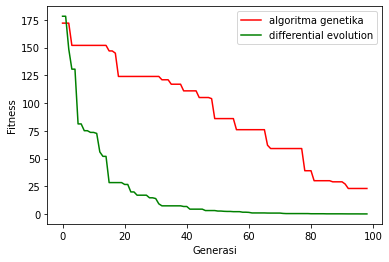

In [9]:
plt.plot(listFitnessTerbaik,color='red',label='algoritma genetika')
plt.plot(schewelTerbaik,color='green',label='differential evolution')
plt.xlabel('Generasi')
plt.ylabel('Fitness')
plt.legend()

## DIFFERENTIAL EVOLUTION DENGAN SCHEWEL'S FUNCTION 2.22 DENGAN 30X RUN

In [17]:
#             DIFFERENTIAL EVOLUTION DENGAN SCHEWEL'S FUNCTION
# DIFFERENTIAL EVOLUTION DENGAN SCHEWEL'S FUNCTION#
#run 30 kali, cari nilai terbaik, tentukan mean, stdev, dan min

import numpy as np
import random
import matplotlib.pyplot as plt

#INISIALISASI PARAMETER
D = 10 # D = ukuran dimensi
epochs = 99
ukuranPopulasi = 10 # N = populasi /ukuranPopulasi
BU = 10 #boundary high (UB)
BL = -10 #boundary low (LB)
CR = 0.9 #crossover, makin besar nilai maka kemungkinan crossover lebih tinggi
F = 0.5
jumlahRun = 30
listschewelterbaik = []

for a in range(jumlahRun):
    #INISIALISASI POPULASI
    induk = np.empty([ukuranPopulasi,D])
    for i in range(ukuranPopulasi):
        for j in range(D):
            induk[i][j] = random.random()*(BU-BL)+BL
    print("INDUK AWAL SEKALI ADALAH:",induk)

    #FUNGSI SPHERE  
    def fungsiObjektif(induk):
        matrix = induk.shape
        ukuranPopulasi = matrix[0]
        jumlahIndividu = matrix[1]
        Fobj = np.empty(ukuranPopulasi)

        for i in range(ukuranPopulasi):
            d1 = 0
            d2 = 0
            d = 0
            for j in range(jumlahIndividu):
                d1 += abs(induk[i][j])
                d2 *= abs(induk[i][j])
                d += d1 + d2
            Fobj[i] = d
        return Fobj

    print(fungsiObjektif(induk))

    #CROSSOVER
    def crossover(induk,fungsiObjektif, j):
        matrix = induk.shape
        ukuranPopulasi = matrix[0]
        jumlahIndividu = matrix[1]

        random1 = random.randint(0,ukuranPopulasi-1)
        random2 = random.randint(0,ukuranPopulasi-1)
        random3 = random.randint(0,ukuranPopulasi-1)

        while random1 == random2:
            random2 = (random2+1)%ukuranPopulasi

        while random3 == random1 or random3 == random2:
            random3 = (random3+1)%ukuranPopulasi

        hasilCrossover = induk[random3][j] + F*(induk[random1][j] - induk[random2][j])
        return hasilCrossover

    hasilCrossover = crossover(induk,fungsiObjektif, 1)
    print(hasilCrossover)
    print("induk awal: \n", induk)
    print("hasil sphere: \n", fungsiObjektif(induk))
    print("hasil crossover: \n", hasilCrossover)

    x = np.empty((1, D))
    objektif = fungsiObjektif(induk)
    schewelTerbaik = np.empty(epochs)
    schewelTerbaik[0] = objektif.min()

    for loop in range(epochs):
        for i in range(ukuranPopulasi):
            for j in range(D):
                x[0][j] = induk[i][j]

            jrand = random.randint(0,D)

            for j in range(D):
                if random.random() < CR or j == jrand:
                    crossbaru = crossover(induk, F, j)
                    x[0][j] = crossbaru

            #replace
            objx = fungsiObjektif(x)
            if objx < objektif[i]:
                objektif[i] = objx
                for j in range(D):
                    induk[i][j] = x[0][j]

        schewelTerbaik[loop] = objektif.min()
    print("run ke-:",a)
    print("schewel terbaik ke ", a)
    print(schewelTerbaik)
    listschewelterbaik.append(np.min(schewelTerbaik))
print(listschewelterbaik)

INDUK AWAL SEKALI ADALAH: [[ 9.53008340e-01 -4.21279999e+00 -9.31149125e+00  2.22957547e+00
  -4.63469650e-01  8.46565425e+00  5.12781947e+00  5.31104173e+00
  -1.23463330e+00  8.05180496e+00]
 [ 3.04358879e-02 -4.26090216e+00 -6.37962692e-01 -6.92509686e+00
   8.36614262e-03 -9.67712041e+00  6.41638937e+00  3.00247161e+00
   7.81645616e+00  3.34664255e+00]
 [ 5.88453470e+00 -6.26356183e+00  8.37586366e+00 -3.72580411e+00
  -9.16903533e+00 -7.43145335e-01 -1.49817769e+00  1.18298706e+00
   4.93632753e-01 -2.93701702e+00]
 [-4.41751609e+00 -7.34285297e-01  4.35081699e+00 -1.94515871e+00
  -4.29134774e-01 -5.65562619e+00  9.17610851e+00 -5.16395850e+00
   3.86189709e+00  5.12425156e+00]
 [-2.03850044e+00 -5.32629216e+00  6.00769284e+00 -6.93627646e+00
   8.44282203e-01  4.07481896e+00  9.79726003e+00  4.84065984e-01
   1.81639246e+00  9.31228744e+00]
 [-5.25612937e+00 -1.07933112e+00 -1.29713460e+00 -2.69168391e+00
  -7.38735741e+00 -1.24144365e+00 -3.24729069e-02  6.99820900e+00
   4.66

## HASIL MEAN, STDEV, MIN DARI 30X RUN DIFFERENTIAL EVOLUTION DENGAN SCHEWEL'S FUNCTION 2.22

In [18]:
print("30 kali run -DIFFERENTIAL EVOLUTION ALGORITHM DENGAN SCHEWEL'S FUNCTION 2.22-")
#membuat looping sejumlah list schewel terbaik
for i in range(len(listschewelterbaik)):
    print(i+1, ".   :", listschewelterbaik[i])

#mencari mean dari list schewel terbaik
mean = np.mean(listschewelterbaik, axis=0)
print("mean DE SCHEWEL'S  function:", mean)

#mencari stdev dari list schewel terbaik
stdev = np.std(listschewelterbaik, axis=0)
print("stdev DE SCHEWEL'S  function:", stdev)

#mencari min dari list shewel terbaik
min = np.min(listschewelterbaik, axis=0)
print("min DE SCHEWEL'S  function:", min)

30 kali run -DIFFERENTIAL EVOLUTION ALGORITHM DENGAN SCHEWEL'S FUNCTION 2.22-
1 .   : 0.22577547178002996
2 .   : 0.13303093861514675
3 .   : 0.16238714543273225
4 .   : 0.2894998761866981
5 .   : 0.17231845343627827
6 .   : 1.219152596760876
7 .   : 0.2386991749116091
8 .   : 0.14768934791620966
9 .   : 0.3030547481780004
10 .   : 0.3293028999966592
11 .   : 0.060604457423413804
12 .   : 0.07426472246294541
13 .   : 0.29077981968911837
14 .   : 0.20166699487156325
15 .   : 0.15383890580858658
16 .   : 0.26975935457695144
17 .   : 0.1536257693156834
18 .   : 0.25317935877032516
19 .   : 0.16714707814350988
20 .   : 0.16332204373604467
21 .   : 0.13726067507474812
22 .   : 0.3754585629724306
23 .   : 0.22700305100972873
24 .   : 0.37720533972562253
25 .   : 0.16390689513774576
26 .   : 0.22638008200487902
27 .   : 0.2433695418867758
28 .   : 0.028757781511732104
29 .   : 0.12728487713773023
30 .   : 0.0826944017816015
mean DE SCHEWEL'S  function: 0.23328067887517923
stdev DE SCHEWEL'S  

## GENETIC ALGORITHM DENGAN SCHEWEL'S FUNCTION 2.22 DENGAN 30X RUN

In [5]:
#             GENETIC ALGORITHM DENGAN RASTRIGIN'S FUNCTION
# GENETIC ALGORITHM DENGAN RASTRIGIN'S FUNCTION#
#run 30 kali, cari nilai terbaik, tentukan mean, stdev, dan min

import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from array import *

#INISIALISASI PARAMETER
D=10 # D = ukuran dimensi
maxit=99
ukuranPopulasi=10
LB= -10
UB= 10
F=  0.5
CR = 0.9
listFitJmlRun = []
jumlahRun = 30
for a in range(jumlahRun):
      def initPopulasi(ukuranPopulasi,D,UB,LB):
        P=np.empty((ukuranPopulasi,D))
        for i in range(ukuranPopulasi):
          for j in range(D):
            P[i][j]=(random.random()*(UB-LB))+LB
        return P

      P= initPopulasi(ukuranPopulasi,D,UB,LB)
      print(P)

      #objektif
      def fungsiObjektif(populasi):
        sz=populasi.shape
        ukuranPopulasi=sz[0]
        dimensi=sz[1]
        Fobj=np.empty(ukuranPopulasi)

        for i in range(ukuranPopulasi):
          d1=0
          d2=0
          d=0
          for j in range(dimensi):
            d1 += abs(populasi[i][j])
            d2 *= abs(populasi[i][j])
            d += d1 + d2
          Fobj[i]=d
        return Fobj

      #seleksi
      def seleksi (P,fsObj):
        jmlInduk = 10
        sz = P.shape
        ukuranPopulasi = sz[0]
        dimensi = sz[1]

        Induk = np.empty((jmlInduk,dimensi))
        Induk = Induk.astype('int')
        
        for i in range (10):
          # memilih dua individu secara acak 
          r1 = random.randint(0,ukuranPopulasi-1)
          r2 = random.randint(0,ukuranPopulasi-1)
          
          if  fsObj[r1] < fsObj [r2]:
            for j in range(dimensi):
              Induk [i][j] = P[r1][j]
          else:
            for j in range(dimensi):
              Induk [i][j] = P[r2][j]
        return Induk

      Induk = seleksi(P,Fobj)
      print(Induk)

      #crossover 
      def PMX(Induk):
        sz = Induk.shape
        brs = sz[0]
        kol = sz[1]

        Anak = np.empty((2,kol))
        Anak = Anak.astype('int')

        r1 = random.randint(1,kol-2)

        for i0 in range(r1): 
          Anak [0][i0] = Induk[0][i0]
          Anak [1][i0] = Induk[1][i0]
          
        batasCek1 = r1
        batasCek2 = r1

        for i in range(kol):
          m = (i+r1)%kol
          n1 = Induk[0][i] 
          n2 = Induk[1][i]

          #mengecek apakah kota tertentu sudah ada di anak
          idxAda1 = 0
          idxAda2 = 0
          for j1 in range(batasCek1): 
            if batasCek1>(kol-1):
              idxAda1 = 1

            if Anak [0][j1] ==n2: 
              idxAda1 = 1
                  
          for j2 in range(batasCek2): 
            if batasCek2>(kol-1):
              idxAda2 = 1

            if Anak [1][i0]  == n1: 
              idxAda2 = 1

          if idxAda1 == 0:
            Anak[0][batasCek1] = n2
            batasCek1 = batasCek1 +1
        
          if idxAda2 == 0:
            Anak[1][batasCek2] = n1
            batasCek2 = batasCek2 +1
        
        return Anak

      AnakCX = PMX(Induk)
      print("Anak :",AnakCX)

      #mutasi swap
      def MutasiSwap(Induk):
        sz = Induk.shape
        brs = sz[0]
        kol = sz[1]

        Anak = np.empty((2,kol))
        Anak = Anak.astype('int')
        Anak = Induk

        r1 = random.randint(0,kol-1)
        r2 = random.randint(0,kol-1)

        while r1 == r2:
          r2 = random.randint(0,kol-1)

        I1rs1 = Induk [0][r1]
        I1rs2 = Induk [0][r2]
        I2rs1 = Induk [1][r1]
        I2rs2 = Induk [1][r2] 
        Anak [0][r1] = I1rs2
        Anak [0][r2] = I1rs1
        Anak [1][r1] = I2rs2  
        Anak [1][r2] = I2rs1
        return Anak

      print("AnakCX :",AnakCX)
      AnakM = MutasiSwap(AnakCX)
      print("AnakM :",AnakM)

      #etilism
      def Elitism(P,Anak,Fobj,fitAnak):
        szP = P.shape
        brsP = szP[0]
        kolP = szP[1]
        szA = Anak.shape
        brsA = szA[0]
        kolA = szA[1]

        for i in range(brsA):
          iJelek = Fobj.max()
          idxJelek = Fobj.argmax()

          if fitAnak[i]<iJelek:
            Fobj[idxJelek] = fitAnak[i]
            for j in range (kolP):
              P[idxJelek][j] = Anak[i][j]
        return [P,Fobj]

      fitAnak= fungsiObjektif(AnakM)
      print(P)
      print(AnakM)
      print(Fobj)
      print(fitAnak)
      P = Elitism (P,AnakM,Fobj,fitAnak)
      print(P)
      print(Fobj)


      #inisialisasi parameter
      PCX = 0.9
      Pm = 0.01

      # Inisialisasi populasi 
      P = initPopulasi(ukuranPopulasi,D,UB,LB)
      
      #melakukan evaluasi P
      Fobj = fungsiObjektif(P)
      print("fitness populasi awal:",Fobj)
      print("fitness terbaik awal:",Fobj.min())
      print("rute awal :",P[Fobj.argmin()])
      listFitnessTerbaik = []

      for i in range(maxit):
        print("generasi :",i)
        Induk = seleksi(P,Fobj)
        print("Induk :",Induk)

        Anak = Induk

        rxo = random.random()
        if rxo < PCX:
          Anak = PMX(Induk)
          
          rm = random.random()
          if rm < Pm:
            Anak = MutasiSwap(Anak)
            
        fitAnak = fungsiObjektif(Anak)
        print("fitness Anak ke-:",i, "=",fitAnak)
        [P, Fobj]= Elitism (P,Anak,Fobj,fitAnak)   
        listFitnessTerbaik.append(Fobj.min())
        
      print("fitness populasi akhir:",Fobj)
      print("fitness akhir:",Fobj.min())
      print("rute akhir :",P[Fobj.argmin()])
      print("list fitness terbaik:",listFitnessTerbaik)
      listFitJmlRun.append(np.min(listFitnessTerbaik))

print("list fitness jumlah run:",listFitJmlRun)

[[ 1.65970145 -8.28461489  5.7916359   9.54995033  7.74836625  2.11625863
  -9.56762134 -0.3476126   3.05640794  3.54635083]
 [-4.94904399  9.66851519 -2.71266354  5.22941796 -0.04108574 -6.94529944
  -1.77776698 -3.48713159 -3.03702613 -5.30923496]
 [ 4.65796216  2.15315601 -2.77905447  6.44468622  8.53507963  5.92604571
   7.04139337 -5.08143809  1.58477703  2.6531473 ]
 [ 4.36588429 -2.67977087 -6.00654004  5.6747027   6.91339318 -3.68786461
  -5.66750427 -6.82630613  3.29556085  6.55149633]
 [-1.54121972 -3.81333765  5.84168891 -3.17160609  7.38616413  8.70698787
   9.32673914 -0.26267784  5.11567123 -0.18933368]
 [-4.35648606  2.93409821 -5.96495389 -8.73107479  9.10256676 -1.126904
   8.21664321 -5.54063243 -0.74921622 -2.28414057]
 [ 7.68356674  7.44578831  6.58838278 -1.60446565  8.78865108 -5.94082739
   1.40839838  8.86986476  5.1961624  -5.81016818]
 [ 8.88734821  3.9249158  -0.50438393 -2.06553654  0.05784255 -5.78415543
   2.31943439  8.35705053 -4.2179371   0.65666384]
 [

## HASIL MEAN, STDEV, MIN DARI 30X RUN GENETIC ALGORITHM DENGAN SCHEWEL'S FUNCTION 2.22

In [6]:
print("30 kali run -GENETIC ALGORITHM DENGAN SCHEWEL'S FUNCTION-")
#membuat looping sejumlah list schewel's terbaik
for i in range(len(listFitJmlRun)):
    print(i+1, ".   :", listFitJmlRun[i])

#mencari mean dari list schewel's terbaik
mean = np.mean(listFitJmlRun, axis=0)
print("mean GA SCHEWEL'S function:", mean)

#mencari stdev dari list schewel's terbaik
stdev = np.std(listFitJmlRun, axis=0)
print("stdev GA SCHEWEL'S function:", stdev)

#mencari min dari list schewel's terbaik
min = np.min(listFitJmlRun, axis=0)
print("min GA SCHEWEL'S function:", min)

30 kali run -GENETIC ALGORITHM DENGAN SCHEWEL'S FUNCTION-
1 .   : 20.0
2 .   : 105.0
3 .   : 20.0
4 .   : 70.0
5 .   : 185.0
6 .   : 8.0
7 .   : 36.0
8 .   : 93.0
9 .   : 103.0
10 .   : 9.0
11 .   : 163.0
12 .   : 220.0
13 .   : 27.0
14 .   : 60.0
15 .   : 125.0
16 .   : 87.0
17 .   : 101.0
18 .   : 8.0
19 .   : 64.0
20 .   : 11.0
21 .   : 72.0
22 .   : 66.0
23 .   : 185.0
24 .   : 55.0
25 .   : 63.0
26 .   : 133.0
27 .   : 20.0
28 .   : 13.0
29 .   : 21.0
30 .   : 23.0
mean GA SCHEWEL'S function: 72.2
stdev GA SCHEWEL'S function: 58.37373838750893
min GA SCHEWEL'S function: 8.0


===============AKHIR DARI GENETIC ALGORITM DAN DIFFERENTIAL EVOLUTION DENGAN SCHEWEL'S FUNCTION 2.22=========================

# 3. GENETIC ALGORITHM DAN DIFFERENTIAL EVOLUTION DENGAN GENERALIZED ROSENBROCK FUNCTION

## DIFFERENTIAL EVOLUTION ALGORITHM DENGAN ROSENBROCK FUNCTION

INDUK AWAL SEKALI ADALAH: [[ 24.04465814 -19.59193502  -7.13845082   2.30618323  -9.61837061
    1.43759948  22.64301412   8.6095371   -4.27321965  28.38347452]
 [  9.7335912    9.93002577 -28.78513373 -17.76535799  10.11081335
   -6.87727516  -1.25178239 -19.84143091  15.54704808 -25.29615153]
 [-16.8050582   19.80218976  15.89868445  19.27600682 -14.80003454
    5.29094252  18.9983663    6.50828115  25.48077168  -2.52166391]
 [ 19.04608542  12.14458705   3.62477541  18.86292991 -21.38723968
    2.43929736  -1.62108124  24.42274177   2.72427423  -9.36089298]
 [-26.152193    27.5345884   -7.23695585   1.31158262 -15.65898999
  -10.33165081   9.97325479  -8.4090987   28.54241835  23.53244202]
 [-10.42536833 -10.720313    24.19225121 -15.39338356 -20.51991186
    0.53250895   3.8262799  -27.13008605   1.9268675  -18.49655232]
 [ 14.08758293   8.0709635  -22.72903425 -19.03926993   9.00973838
   -2.92493543   0.22245998   0.1681611  -12.25365066 -16.9455919 ]
 [ -2.74259023  13.83874145  

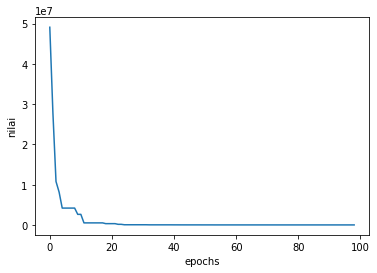

In [4]:
#             DIFFERENTIAL EVOLUTION DENGAN ROSENBROCK FUNCTION
# DIFFERENTIAL EVOLUTION ALGORITHM DENGAN ROSENBROCK FUNCTION#

import numpy as np
import random
import matplotlib.pyplot as plt

#INISIALISASI PARAMETER
D = 10 # D = ukuran dimensi
epochs = 99
ukuranPopulasi = 10 # N = populasi /ukuranPopulasi
BU = 30 #boundary high (UB)
BL = -30 #boundary low (LB)
CR = 0.9 #crossover, makin besar nilai maka kemungkinan crossover lebih tinggi
F = 0.5

#INISIALISASI POPULASI
induk = np.empty([ukuranPopulasi,D])
for i in range(ukuranPopulasi):
    for j in range(D):
        induk[i][j] = random.random()*(BU-BL)+BL
print("INDUK AWAL SEKALI ADALAH:",induk)

#FUNGSI OBJEKTIF
#rumus rosenbrock
def fungsiObjektif(induk):
    matrix = induk.shape
    ukuranPopulasi = matrix[0]
    jumlahIndividu = matrix[1]
    Fobj = np.empty(ukuranPopulasi)
    for i in range(ukuranPopulasi):
        d = 0
        for j in range(jumlahIndividu-1):
            d += 100*(induk[i][j+1]-induk[i][j]**2)**2 + (induk[i][j]-1)**2
        Fobj[i] = d
    return Fobj
print(fungsiObjektif(induk))


#CROSSOVER
def crossover(induk,fungsiObjektif, j):
    matrix = induk.shape
    ukuranPopulasi = matrix[0]
    jumlahIndividu = matrix[1]
    random1 = random.randint(0,ukuranPopulasi-1)
    random2 = random.randint(0,ukuranPopulasi-1)
    random3 = random.randint(0,ukuranPopulasi-1)
    while random1 == random2:
        random2 = (random2+1)%ukuranPopulasi
    while random3 == random1 or random3 == random2:
        random3 = (random3+1)%ukuranPopulasi
    hasilCrossover = induk[random3][j] + F*(induk[random1][j] - induk[random2][j])
    return hasilCrossover
hasilCrossover = crossover(induk,fungsiObjektif, 1)
print(hasilCrossover)

print("induk awal: \n", induk)
print("hasil objektif: \n", fungsiObjektif(induk))
print("hasil crossover: \n", hasilCrossover)

x = np.empty((1, D))
objektif = fungsiObjektif(induk)
rosenbrockTerbaik = np.empty(epochs)
rosenbrockTerbaik[0] = objektif.min()
for loop in range(epochs):
    for i in range(ukuranPopulasi):
        for j in range(D):
            x[0][j] = induk[i][j]
        jrand = random.randint(0,D)
        for j in range(D):
            if random.random() < CR or j == jrand:
                crossbaru = crossover(induk, F, j)
                x[0][j] = crossbaru

        #replace
        objx = fungsiObjektif(x)
        if objx < objektif[i]:
            objektif[i] = objx
            for j in range(D):
                induk[i][j] = x[0][j]
    rosenbrockTerbaik[loop] = objektif.min()
    print("nilai iterasi ke-", loop+1, ": ", rosenbrockTerbaik[loop]) 
print(rosenbrockTerbaik)


#PLOT
plt.plot(rosenbrockTerbaik)
plt.xlabel('epochs')
plt.ylabel('nilai')
plt.show()


## GENETIC ALGORITHM DENGAN ROSENBROCK FUNCTION

[[  9.71912083   9.19471913  -4.67699345 -12.8725521   17.16408706
   -2.54646047  18.93886134  -6.80412623  24.14190931   8.17344239]
 [ 14.71785334  17.31270453  26.70172246   7.81714412   4.47186283
  -29.18237594   4.05944075 -15.38773028   1.22222357 -12.64467036]
 [-27.88757135 -14.01515104 -23.70529388  19.55308711 -17.83151648
  -22.55883288  12.02080441 -23.20604506   1.06326306  28.72095157]
 [ 13.1718495    4.03519405  -1.56899918  -8.29305169   1.90955588
   15.05606108  19.68552862  18.43510821 -14.75165411  17.79561104]
 [ -4.81319935  -3.16310503 -20.63183382  -3.15366807 -22.91433695
   13.40238291 -12.17643384 -14.42590997 -16.75987457  -6.68244663]
 [ 28.83534062  16.37783937 -11.02491519   5.84419083 -14.52560644
   -9.71908726 -12.29562683  17.78634685  13.5860371  -24.6083981 ]
 [  6.82049298   3.11883024 -15.94023237 -21.57955996 -18.00010736
  -11.95201147 -25.48182628 -21.79310435 -10.20176191  -1.81209174]
 [-26.37193076  20.96032619   7.93587966  27.9797959   

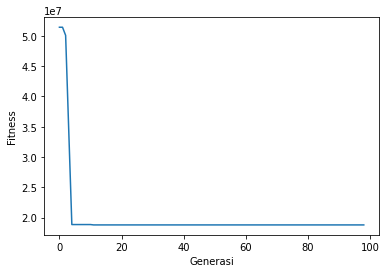

In [9]:
#                    GENETIC ALGORITHM DENGAN ROSENBROCK FUNCTION             #
#                    GENETIC ALGORITHM WITH ROSENBROCK FUNCTION             #

import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from array import *

#INISIALISASI PARAMETER
D=10
maxit=99
ukuranPopulasi=10
LB= -30 #boundary low
UB= 30 #boundary high
F=  0.5
CR = 0.9

def initPopulasi(ukuranPopulasi,D,UB,LB):
  P=np.empty((ukuranPopulasi,D))
  for i in range(ukuranPopulasi):
    for j in range(D):
      P[i][j]=(random.random()*(UB-LB))+LB
  return P
P= initPopulasi(ukuranPopulasi,D,UB,LB)
print(P)


#objektif
def fungsiObjektif(populasi):
  sz=populasi.shape
  ukuranPopulasi=sz[0]
  dimensi=sz[1]
  Fobj=np.empty(ukuranPopulasi)
  for i in range(ukuranPopulasi):
    d=0
    for j in range(dimensi-1):
      d += 100*(populasi[i][j+1]-populasi[i][j]**2)**2 + (populasi[i][j]-1)**2
    Fobj[i]=d
  return Fobj
Fobj = fungsiObjektif(P)
print(Fobj)


#seleksi
def seleksi (P,fsObj):
  jmlInduk = 10
  sz = P.shape
  ukuranPopulasi = sz[0]
  dimensi = sz[1]
  Induk = np.empty((jmlInduk,dimensi))
  Induk = Induk.astype('int')
  for i in range (10):
    # memilih dua individu secara acak 
    r1 = random.randint(0,ukuranPopulasi-1)
    r2 = random.randint(0,ukuranPopulasi-1)
    
    if  fsObj[r1] < fsObj [r2]:
      for j in range(dimensi):
        Induk [i][j] = P[r1][j]
    else:
      for j in range(dimensi):
        Induk [i][j] = P[r2][j]
  return Induk
Induk = seleksi(P,Fobj)
print(Induk)


#crossover 
def PMX(Induk):
  sz = Induk.shape
  brs = sz[0]
  kol = sz[1]
  Anak = np.empty((2,kol))
  Anak = Anak.astype('int')
  r1 = random.randint(1,kol-2)
  for i0 in range(r1): 
    Anak [0][i0] = Induk[0][i0]
    Anak [1][i0] = Induk[1][i0]
    
  batasCek1 = r1
  batasCek2 = r1

  for i in range(kol):
    m = (i+r1)%kol
    n1 = Induk[0][i] 
    n2 = Induk[1][i]
    #mengecek apakah kota tertentu sudah ada di anak
    idxAda1 = 0
    idxAda2 = 0
    for j1 in range(batasCek1): 
      if batasCek1>(kol-1):
        idxAda1 = 1
      if Anak [0][j1] ==n2: 
        idxAda1 = 1
            
    for j2 in range(batasCek2): 
      if batasCek2>(kol-1):
        idxAda2 = 1
      if Anak [1][i0]  == n1: 
        idxAda2 = 1

    if idxAda1 == 0:
      Anak[0][batasCek1] = n2
      batasCek1 = batasCek1 +1
   
    if idxAda2 == 0:
      Anak[1][batasCek2] = n1
      batasCek2 = batasCek2 +1 
  return Anak
AnakCX = PMX(Induk)
print("Anak :",AnakCX)

#mutasi swap
def MutasiSwap(Induk):
  sz = Induk.shape
  brs = sz[0]
  kol = sz[1]
  Anak = np.empty((2,kol))
  Anak = Anak.astype('int')
  Anak = Induk
  r1 = random.randint(0,kol-1)
  r2 = random.randint(0,kol-1)
  while r1 == r2:
    r2 = random.randint(0,kol-1)

  I1rs1 = Induk [0][r1]
  I1rs2 = Induk [0][r2]
  I2rs1 = Induk [1][r1]
  I2rs2 = Induk [1][r2] 
  Anak [0][r1] = I1rs2
  Anak [0][r2] = I1rs1
  Anak [1][r1] = I2rs2  
  Anak [1][r2] = I2rs1
  return Anak
print("AnakCX :",AnakCX)
AnakM = MutasiSwap(AnakCX)
print("AnakM :",AnakM)


#etilism
def Elitism(P,Anak,Fobj,fitAnak):
  szP = P.shape
  brsP = szP[0]
  kolP = szP[1]
  szA = Anak.shape
  brsA = szA[0]
  kolA = szA[1]
  for i in range(brsA):
    iJelek = Fobj.max()
    idxJelek = Fobj.argmax()
    if fitAnak[i]<iJelek:
      Fobj[idxJelek] = fitAnak[i]
      for j in range (kolP):
        P[idxJelek][j] = Anak[i][j]
  return [P,Fobj]
fitAnak= fungsiObjektif(AnakM)
print(P)
print(AnakM)
print(Fobj)
print(fitAnak)
P = Elitism (P,AnakM,Fobj,fitAnak)
print(P)
print(Fobj)


#inisialisasi parameter
PCX = 0.9
Pm = 0.01

# Inisialisasi populasi 
P = initPopulasi(ukuranPopulasi,D,UB,LB)

#melakukan evaluasi P
Fobj = fungsiObjektif(P)
print("fitness populasi awal:",Fobj)
print("fitness terbaik awal:",Fobj.min())
print("rute awal :",P[Fobj.argmin()])
listFitnessTerbaik = []
for i in range(maxit):
  print("generasi :",i)
  Induk = seleksi(P,Fobj)
  print("Induk :",Induk)
  Anak = Induk
  rxo = random.random()
  if rxo < PCX:
    Anak = PMX(Induk)
    rm = random.random()
    if rm < Pm:
      Anak = MutasiSwap(Anak)
  fitAnak = fungsiObjektif(Anak)
  print("fitness Anak ke-:",i, "=",fitAnak)
  [P, Fobj]= Elitism (P,Anak,Fobj,fitAnak)   
  listFitnessTerbaik.append(Fobj.min())
  
print("fitness populasi akhir:",Fobj)
print("fitness akhir:",Fobj.min())
print("rute akhir :",P[Fobj.argmin()])
print("list fitness terbaik:",listFitnessTerbaik)


plt.plot(listFitnessTerbaik)
plt.xlabel('Generasi')
plt.ylabel('Fitness')
plt.show()


## GRAFIK PERBANDINGAN DIFFERENTIAL EVOLUTION DENGAN GENETIC ALGORITHM DENGAN ROSENBROCK FUNCTION

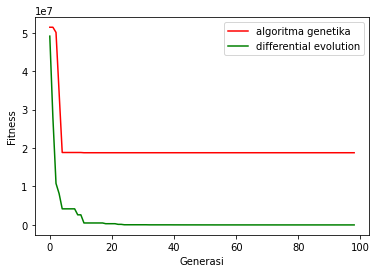

In [10]:
plt.plot(listFitnessTerbaik,color='red',label='algoritma genetika')
plt.plot(rosenbrockTerbaik,color='green',label='differential evolution')

plt.xlabel('Generasi')
plt.ylabel('Fitness')
plt.legend()

## DIFFERENTIAL EVOLUTION DENGAN ROSENBROCK FUNCTION DENGAN 30X RUN

In [12]:
#             DIFFERENTIAL EVOLUTION DENGAN ROSENBROCK FUNCTION
# DIFFERENTIAL EVOLUTION DENGAN ROSENBROCK FUNCTION#
#run 30 kali, cari nilai terbaik, tentukan mean, stdev, dan min

import numpy as np
import random
import matplotlib.pyplot as plt

#INISIALISASI PARAMETER
D = 10 # D = ukuran dimensi
epochs = 99
ukuranPopulasi = 10 # N = populasi /ukuranPopulasi
BU = 30 #boundary high (UB)
BL = -30 #boundary low (LB)
CR = 0.9 #crossover, makin besar nilai maka kemungkinan crossover lebih tinggi
F = 0.5
jumlahRun = 30
listrosenbrockterbaik = []

for a in range(jumlahRun):
    #INISIALISASI POPULASI
    induk = np.empty([ukuranPopulasi,D])
    for i in range(ukuranPopulasi):
        for j in range(D):
            induk[i][j] = random.random()*(BU-BL)+BL
    print("INDUK AWAL SEKALI ADALAH:",induk)

    #FUNGSI OBJEKTIF ROSENBROCK 
    def fungsiObjektif(induk):
        matrix = induk.shape
        ukuranPopulasi = matrix[0]
        jumlahIndividu = matrix[1]
        Fobj = np.empty(ukuranPopulasi)
        for i in range(ukuranPopulasi):
            d = 0
            for j in range(jumlahIndividu-1):
                d += 100*(induk[i][j+1]-induk[i][j]**2)**2 + (induk[i][j]-1)**2
            Fobj[i] = d
        return Fobj
    print(fungsiObjektif(induk))

    #CROSSOVER
    def crossover(induk,fungsiObjektif, j):
        matrix = induk.shape
        ukuranPopulasi = matrix[0]
        jumlahIndividu = matrix[1]
        random1 = random.randint(0,ukuranPopulasi-1)
        random2 = random.randint(0,ukuranPopulasi-1)
        random3 = random.randint(0,ukuranPopulasi-1)

        while random1 == random2:
            random2 = (random2+1)%ukuranPopulasi
        while random3 == random1 or random3 == random2:
            random3 = (random3+1)%ukuranPopulasi
        hasilCrossover = induk[random3][j] + F*(induk[random1][j] - induk[random2][j])
        return hasilCrossover
    hasilCrossover = crossover(induk,fungsiObjektif, 1)
    print(hasilCrossover)

    print("induk awal: \n", induk)
    print("hasil sphere: \n", fungsiObjektif(induk))
    print("hasil crossover: \n", hasilCrossover)

    x = np.empty((1, D))
    objektif = fungsiObjektif(induk)
    rosenbrockTerbaik = np.empty(epochs)
    rosenbrockTerbaik[0] = objektif.min()

    for loop in range(epochs):
        for i in range(ukuranPopulasi):
            for j in range(D):
                x[0][j] = induk[i][j]
            jrand = random.randint(0,D)

            for j in range(D):
                if random.random() < CR or j == jrand:
                    crossbaru = crossover(induk, F, j)
                    x[0][j] = crossbaru

            #replace
            objx = fungsiObjektif(x)
            if objx < objektif[i]:
                objektif[i] = objx
                for j in range(D):
                    induk[i][j] = x[0][j]
        rosenbrockTerbaik[loop] = objektif.min()
    print("run ke-:",a)
    print("rastrigin terbaik ke ", a)
    print(rosenbrockTerbaik)
    listrosenbrockterbaik.append(np.min(rosenbrockTerbaik))
print(listrosenbrockterbaik)
        



INDUK AWAL SEKALI ADALAH: [[ 29.53793726 -21.26239107 -14.35637101 -15.3607772  -25.09270368
   -5.42074474 -23.96104636 -15.51846461 -18.50411129   8.78335786]
 [ 22.22390254   9.56954556  -3.52526846 -28.38827767 -24.36761687
    5.00110759  26.58829291  12.27725824 -23.00796034 -18.76237321]
 [-25.89814177  12.31515075  -2.58349494  12.2539535    3.90325966
   -0.73415645 -15.96041604  -7.33426131  10.26693975  -7.47847764]
 [ 22.35989081 -10.42774899  28.14518364  14.81278403  27.92615211
   -1.06830802   4.63940526  10.66085561  11.08747305   1.72009025]
 [-22.93421815  16.26361868 -22.55903173 -12.61938828  11.39282843
  -29.18644224  18.07420621  29.25277355 -11.85569282  15.39958993]
 [-18.89070486 -13.10713989  28.61648614 -13.44249933   8.54066025
   -1.45221841  15.4225764  -12.29204709   3.69035577  -5.43072522]
 [-29.83138689 -24.64751054   6.51482318 -29.58448789  -0.4123009
  -11.94177304 -15.20547208   2.57340775  -3.41367176  18.30231996]
 [ 12.59119402  18.87418091  -

## HASIL MEAN, STDEV, MIN DARI 30X RUN DIFFERENTIAL EVOLUTION DENGAN ROSENBROCK FUNCTION

In [13]:
print("30 kali run -DIFFERENTIAL EVOLUTION ALGORITHM DENGAN ROSENBROCK FUNCTION-")
#membuat looping sejumlah list rosenbrock terbaik
for i in range(len(listrosenbrockterbaik)):
    print(i+1, ".   :", listrosenbrockterbaik[i])

#mencari mean dari list rosenbrock terbaik
mean = np.mean(listrosenbrockterbaik, axis=0)
print("mean DE ROSENBROCK function:", mean)

#mencari stdev dari list rosenbrock terbaik
stdev = np.std(listrosenbrockterbaik, axis=0)
print("stdev DE ROSENBROCK function:", stdev)

#mencari min dari list rosenbrock terbaik
min = np.min(listrosenbrockterbaik, axis=0)
print("min DE ROSENBROCK function:", min)

30 kali run -DIFFERENTIAL EVOLUTION ALGORITHM DENGAN ROSENBROCK FUNCTION-
1 .   : 670.5077270888447
2 .   : 1243.7563150150602
3 .   : 10461.074789405373
4 .   : 1807.0751221790695
5 .   : 39303.91584245658
6 .   : 189.97926833478795
7 .   : 546.9007003815857
8 .   : 80.12593894762638
9 .   : 777.4395728674191
10 .   : 33.71383591284908
11 .   : 11948.19909567894
12 .   : 223.38048353899
13 .   : 442.2294826254987
14 .   : 97.37327043550944
15 .   : 104.70000033157399
16 .   : 3111.907651151352
17 .   : 1318.3812672531737
18 .   : 161.85970260212895
19 .   : 478.1362915266321
20 .   : 478.6356034212007
21 .   : 490.572083367749
22 .   : 135017.59250931488
23 .   : 2761.6360285030305
24 .   : 371.56322778307873
25 .   : 458.76930294686656
26 .   : 110.89499089123635
27 .   : 118.71179817948214
28 .   : 14.005534659259089
29 .   : 476.22548611281763
30 .   : 2815.1823441662696
mean DE ROSENBROCK function: 7203.814842235963
stdev DE ROSENBROCK function: 24835.90730064884
min DE ROSENBROCK

## GENETIC ALGORITHM DENGAN ROSENBROCK FUNCTION DENGAN 30X RUN

In [14]:
#             GENETIC ALGORITHM DENGAN ROSENBROCK FUNCTION
# GENETIC ALGORITHM DENGAN ROSENBROCK FUNCTION#
#run 30 kali, cari nilai terbaik, tentukan mean, stdev, dan min

import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from array import *

#INISIALISASI PARAMETER
D=10 # D = ukuran dimensi
maxit=99
ukuranPopulasi=10
LB= -30
UB= 30
F=  0.5
CR = 0.9
listFitJmlRun = []
jumlahRun = 30

for a in range(jumlahRun):
      def initPopulasi(ukuranPopulasi,D,UB,LB):
        P=np.empty((ukuranPopulasi,D))
        for i in range(ukuranPopulasi):
          for j in range(D):
            P[i][j]=(random.random()*(UB-LB))+LB
        return P
      P= initPopulasi(ukuranPopulasi,D,UB,LB)
      print(P)

      #objektif
      def fungsiObjektif(populasi):
        sz=populasi.shape
        ukuranPopulasi=sz[0]
        dimensi=sz[1]
        Fobj=np.empty(ukuranPopulasi)
        for i in range(ukuranPopulasi):
          d=0
          for j in range(dimensi-1):
            d += 100*(populasi[i][j+1]-populasi[i][j]**2)**2 + (populasi[i][j]-1)**2
          Fobj[i]=d
        return Fobj
      Fobj = fungsiObjektif(P)
      print(Fobj)

      #seleksi
      def seleksi (P,fsObj):
        jmlInduk = 10
        sz = P.shape
        ukuranPopulasi = sz[0]
        dimensi = sz[1]
        Induk = np.empty((jmlInduk,dimensi))
        Induk = Induk.astype('int')
        
        for i in range (10):
          # memilih dua individu secara acak 
          r1 = random.randint(0,ukuranPopulasi-1)
          r2 = random.randint(0,ukuranPopulasi-1)
          if  fsObj[r1] < fsObj [r2]:
            for j in range(dimensi):
              Induk [i][j] = P[r1][j]
          else:
            for j in range(dimensi):
              Induk [i][j] = P[r2][j]
        return Induk
      Induk = seleksi(P,Fobj)
      print(Induk)

      #crossover 
      def PMX(Induk):
        sz = Induk.shape
        brs = sz[0]
        kol = sz[1]
        Anak = np.empty((2,kol))
        Anak = Anak.astype('int')
        r1 = random.randint(1,kol-2)

        for i0 in range(r1):
          Anak [0][i0] = Induk[0][i0]
          Anak [1][i0] = Induk[1][i0]
        
        batasCek1 = r1
        batasCek2 = r1

        for i in range(kol):
          m = (i+r1)%kol
          n1 = Induk[0][i] 
          n2 = Induk[1][i]

          #mengecek apakah kota tertentu sudah ada di anak
          idxAda1 = 0
          idxAda2 = 0
          for j1 in range(batasCek1): 
            if batasCek1>(kol-1):
              idxAda1 = 1
            if Anak [0][j1] ==n2: 
              idxAda1 = 1
                  
          for j2 in range(batasCek2): 
            if batasCek2>(kol-1):
              idxAda2 = 1
            if Anak [1][i0]  == n1: 
              idxAda2 = 1

          if idxAda1 == 0:
            Anak[0][batasCek1] = n2
            batasCek1 = batasCek1 +1
        
          if idxAda2 == 0:
            Anak[1][batasCek2] = n1
            batasCek2 = batasCek2 +1
        return Anak
      AnakCX = PMX(Induk)
      print("Anak :",AnakCX)

      #mutasi swap
      def MutasiSwap(Induk):
        sz = Induk.shape
        brs = sz[0]
        kol = sz[1]
        Anak = np.empty((2,kol))
        Anak = Anak.astype('int')
        Anak = Induk
        r1 = random.randint(0,kol-1)
        r2 = random.randint(0,kol-1)

        while r1 == r2:
          r2 = random.randint(0,kol-1)

        I1rs1 = Induk [0][r1]
        I1rs2 = Induk [0][r2]
        I2rs1 = Induk [1][r1]
        I2rs2 = Induk [1][r2] 
        Anak [0][r1] = I1rs2
        Anak [0][r2] = I1rs1
        Anak [1][r1] = I2rs2  
        Anak [1][r2] = I2rs1
        return Anak

      print("AnakCX :",AnakCX)
      AnakM = MutasiSwap(AnakCX)
      print("AnakM :",AnakM)

      #etilism
      def Elitism(P,Anak,Fobj,fitAnak):
        szP = P.shape
        brsP = szP[0]
        kolP = szP[1]
        szA = Anak.shape
        brsA = szA[0]
        kolA = szA[1]

        for i in range(brsA):
          iJelek = Fobj.max()
          idxJelek = Fobj.argmax()
          if fitAnak[i]<iJelek:
            Fobj[idxJelek] = fitAnak[i]
            for j in range (kolP):
              P[idxJelek][j] = Anak[i][j]
        return [P,Fobj]

      fitAnak= fungsiObjektif(AnakM)
      print(P)
      print(AnakM)
      print(Fobj)
      print(fitAnak)
      P = Elitism (P,AnakM,Fobj,fitAnak)
      print(P)
      print(Fobj)


      #inisialisasi parameter
      PCX = 0.9
      Pm = 0.01

      # Inisialisasi populasi 
      P = initPopulasi(ukuranPopulasi,D,UB,LB)
      
      #melakukan evaluasi P
      Fobj = fungsiObjektif(P)
      print("fitness populasi awal:",Fobj)
      print("fitness terbaik awal:",Fobj.min())
      print("rute awal :",P[Fobj.argmin()])
      listFitnessTerbaik = []

      for i in range(maxit):
        print("generasi :",i)
        Induk = seleksi(P,Fobj)
        print("Induk :",Induk)
        Anak = Induk
        rxo = random.random()

        if rxo < PCX:
          Anak = PMX(Induk)
          rm = random.random()
          if rm < Pm:
            Anak = MutasiSwap(Anak)

        fitAnak = fungsiObjektif(Anak)
        print("fitness Anak ke-:",i, "=",fitAnak)
        [P, Fobj]= Elitism (P,Anak,Fobj,fitAnak)   
        listFitnessTerbaik.append(Fobj.min())
        
      print("fitness populasi akhir:",Fobj)
      print("fitness akhir:",Fobj.min())
      print("rute akhir :",P[Fobj.argmin()])
      print("list fitness terbaik:",listFitnessTerbaik)
      listFitJmlRun.append(np.min(listFitnessTerbaik))
print("list fitness jumlah run:",listFitJmlRun)


[[-9.84765768e+00  2.91387251e+01 -2.30690517e+01  7.69200891e+00
   4.08449728e+00  2.14147998e+00 -2.21779717e+01 -1.11458283e+01
   5.39638513e+00  2.05725004e+01]
 [-2.48828295e+01  2.04847439e+01  2.27308230e+01 -1.71095654e+01
  -3.25208959e+00 -1.69983695e+01 -1.75003546e+00 -1.48197628e+00
  -2.48126356e+01 -8.95025900e+00]
 [ 9.99152697e+00 -2.78724898e-01 -6.32608404e+00  1.49437760e+00
  -2.60907260e+01 -1.97530870e+01  2.22846297e+01 -1.11994662e-01
   2.68143103e+01 -1.19335205e+01]
 [ 2.91873033e+01  1.19459462e+01  1.59747432e+00  2.36992061e+01
  -3.63129956e+00 -9.29375104e+00 -2.39642807e+01  2.71479813e+01
   9.22427318e+00  1.23837407e+01]
 [ 1.46848824e+01  2.35942528e+01 -2.99091557e+01 -2.42643609e+01
  -1.13535037e+01  1.72878165e+00  3.23510665e+00 -1.47711271e+01
  -6.18907433e+00  1.79525082e+01]
 [-2.37094742e+01  4.34439228e+00 -2.52965491e+01  1.88074191e+01
   1.48616419e+01 -6.19311264e+00  1.40806513e+01  1.47963439e+01
   2.55324412e+00 -1.51704136e+01

## HASIL MEAN, STDEV, MIN DARI 30X RUN GENETIC ALGORITHM DENGAN ROSENBROCK FUNCTION

In [15]:
print("30 kali run -GENETIC ALGORITHM DENGAN ROSENBROCK FUNCTION-")
#membuat looping sejumlah list rosenbrock terbaik
for i in range(len(listFitJmlRun)):
    print(i+1, ".   :", listFitJmlRun[i])

#mencari mean dari list rosenbrock terbaik
mean = np.mean(listFitJmlRun, axis=0)
print("mean GA ROSENBROCK function:", mean)

#mencari stdev dari list rosenbrock terbaik
stdev = np.std(listFitJmlRun, axis=0)
print("stdev GA ROSENBROCK function:", stdev)

#mencari min dari list rosenbrock terbaik
min = np.min(listFitJmlRun, axis=0)
print("min GA ROSENBROCK function:", min)

30 kali run -GENETIC ALGORITHM DENGAN ROSENBROCK FUNCTION-
1 .   : 6856488.0
2 .   : 6139824.0
3 .   : 61130943.0
4 .   : 42636976.0
5 .   : 21915178.0
6 .   : 16756102.0
7 .   : 5821078.0
8 .   : 25242301.0
9 .   : 31600520.0
10 .   : 26328131.0
11 .   : 10768590.0
12 .   : 188490.0
13 .   : 2901295.0
14 .   : 1663002.0
15 .   : 3833372.0
16 .   : 49445436.0
17 .   : 79275571.0
18 .   : 11885236.0
19 .   : 12523848.0
20 .   : 6524446.0
21 .   : 25524618.0
22 .   : 27284010.0
23 .   : 24126.0
24 .   : 792954.0
25 .   : 44021904.0
26 .   : 23924029.0
27 .   : 12937542.0
28 .   : 43257789.0
29 .   : 44763523.0
30 .   : 39481076.0
mean GA ROSENBROCK function: 22848279.933333334
stdev GA ROSENBROCK function: 19851248.20638367
min GA ROSENBROCK function: 24126.0


========AKHIR DARI GENETIC ALGORITHM DAN DIFFERENTIAL EVOLUTION DENGAN GENERALIZED ROSENBRCOCK FUNCTION=============

# 4. GENETIC ALGORITHM DAN DIFFERENTIAL EVOLUTION DENGAN RASTRIGIN'S FUNCTION

## GENETIC ALGORITHM DENGAN RASTRIGIN'S FUNCTION

[[-2.95091971  3.72448487  3.36831133  3.53708117  1.45490258 -1.93268391
  -4.71282584  1.43848545 -3.16207745  0.73709081]
 [-2.5068019   2.31234461 -3.01194658 -2.96621925 -3.67399575 -2.71630321
  -0.3021523  -2.39599289 -2.04102565 -1.57010886]
 [-1.04157037  4.17775534  1.06263163  3.08183495 -2.03006123  3.29923872
   0.82803283 -0.84260854  2.34240382  1.29541515]
 [-2.09421477 -0.69577611 -3.8209229   3.90995817 -1.06571531 -3.94732464
  -2.05337634  0.21628982 -0.11794364 -4.51636909]
 [-1.47304901  1.02067573 -1.07723135  2.78964473 -0.13545679 -2.32884245
   3.8582727   0.90436193  4.81522555 -4.86734567]
 [-4.52831057  3.12054715  3.7687964  -4.63317376  2.37133371 -2.65456946
  -1.20029117 -3.55703848  4.16229514  4.60243871]
 [ 4.85511563 -3.61526006  4.12713017 -1.60577734 -1.69435008 -0.97106479
   0.0333556  -3.2617528   2.78804308 -0.00846897]
 [-0.37218983 -1.4909136  -4.05375249 -4.98749376  4.78008119  4.16145126
  -2.66657792 -3.43623876 -3.77905463  4.03151396]


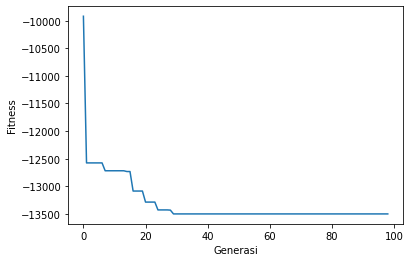

In [16]:
#             GENETIC ALGORITHM DENGAN RASTRIGIN'S FUNCTION
#                    GENETIC ALGORITHM WITH RASTRIGIN'S FUNCTION             #
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from array import *

#INISIALISASI PARAMETER
D=10 
maxit=99
ukuranPopulasi=10
LB= -5.12 #batas bawah / boundary low
UB= 5.12 #batas atas / boundary high
F=  0.5
CR = 0.9

def initPopulasi(ukuranPopulasi,D,UB,LB):
  P=np.empty((ukuranPopulasi,D))
  for i in range(ukuranPopulasi):
    for j in range(D):
      P[i][j]=(random.random()*(UB-LB))+LB
  return P
P= initPopulasi(ukuranPopulasi,D,UB,LB)
print(P)


#objektif
def fungsiObjektif(populasi):
  sz=populasi.shape
  ukuranPopulasi=sz[0]
  dimensi=sz[1]
  Fobj=np.empty(ukuranPopulasi)
  for i in range(ukuranPopulasi):
    d=0
    for j in range(dimensi):
      d+=(d+populasi[i][j]**2)-(10*np.cos(2*np.pi*d+populasi[i][j])+10)
    Fobj[i]=d
  return Fobj
Fobj = fungsiObjektif(P)
print(Fobj)


#seleksi
def seleksi (P,fsObj):
  jmlInduk = 10
  sz = P.shape
  ukuranPopulasi = sz[0]
  dimensi = sz[1]
  Induk = np.empty((jmlInduk,dimensi))
  Induk = Induk.astype('int')
  for i in range (10):
    # memilih dua individu secara acak 
    r1 = random.randint(0,ukuranPopulasi-1)
    r2 = random.randint(0,ukuranPopulasi-1)
    
    if  fsObj[r1] < fsObj [r2]:
      for j in range(dimensi):
        Induk [i][j] = P[r1][j]
    else:
      for j in range(dimensi):
        Induk [i][j] = P[r2][j]
  return Induk
Induk = seleksi(P,Fobj)
print(Induk)


#crossover 
def PMX(Induk):
  sz = Induk.shape
  brs = sz[0]
  kol = sz[1]
  Anak = np.empty((2,kol))
  Anak = Anak.astype('int')
  r1 = random.randint(1,kol-2)

  for i0 in range(r1): 
    Anak [0][i0] = Induk[0][i0]
    Anak [1][i0] = Induk[1][i0]
    
  batasCek1 = r1
  batasCek2 = r1

  for i in range(kol):
    m = (i+r1)%kol
    n1 = Induk[0][i] 
    n2 = Induk[1][i]

    #mengecek apakah kota tertentu sudah ada di anak
    idxAda1 = 0
    idxAda2 = 0
    for j1 in range(batasCek1): 
      if batasCek1>(kol-1):
        idxAda1 = 1
      if Anak [0][j1] ==n2: 
        idxAda1 = 1
            
    for j2 in range(batasCek2): 
      if batasCek2>(kol-1):
        idxAda2 = 1
      if Anak [1][i0]  == n1: 
        idxAda2 = 1

    if idxAda1 == 0:
      Anak[0][batasCek1] = n2
      batasCek1 = batasCek1 +1
   
    if idxAda2 == 0:
      Anak[1][batasCek2] = n1
      batasCek2 = batasCek2 +1
  return Anak
AnakCX = PMX(Induk)
print("Anak :",AnakCX)

#mutasi swap
def MutasiSwap(Induk):
  sz = Induk.shape
  brs = sz[0]
  kol = sz[1]
  Anak = np.empty((2,kol))
  Anak = Anak.astype('int')
  Anak = Induk
  r1 = random.randint(0,kol-1)
  r2 = random.randint(0,kol-1)

  while r1 == r2:
    r2 = random.randint(0,kol-1)

  I1rs1 = Induk [0][r1]
  I1rs2 = Induk [0][r2]
  I2rs1 = Induk [1][r1]
  I2rs2 = Induk [1][r2] 
  Anak [0][r1] = I1rs2
  Anak [0][r2] = I1rs1
  Anak [1][r1] = I2rs2  
  Anak [1][r2] = I2rs1
  return Anak

print("AnakCX :",AnakCX)
AnakM = MutasiSwap(AnakCX)
print("AnakM :",AnakM)


#etilism
def Elitism(P,Anak,Fobj,fitAnak):
  szP = P.shape
  brsP = szP[0]
  kolP = szP[1]
  szA = Anak.shape
  brsA = szA[0]
  kolA = szA[1]

  for i in range(brsA):
    iJelek = Fobj.max()
    idxJelek = Fobj.argmax()
    if fitAnak[i]<iJelek:
      Fobj[idxJelek] = fitAnak[i]
      for j in range (kolP):
        P[idxJelek][j] = Anak[i][j]
  return [P,Fobj]
fitAnak= fungsiObjektif(AnakM)
print(P)
print(AnakM)
print(Fobj)
print(fitAnak)
P = Elitism (P,AnakM,Fobj,fitAnak)
print(P)
print(Fobj)

#inisialisasi parameter
PCX = 0.9
Pm = 0.01

# Inisialisasi populasi 
P = initPopulasi(ukuranPopulasi,D,UB,LB)

#melakukan evaluasi P
Fobj = fungsiObjektif(P)
print("fitness populasi awal:",Fobj)
print("fitness terbaik awal:",Fobj.min())
print("rute awal :",P[Fobj.argmin()])
listFitnessTerbaik = []
for i in range(maxit):
  print("generasi :",i)
  Induk = seleksi(P,Fobj)
  print("Induk :",Induk)
  Anak = Induk
  rxo = random.random()

  if rxo < PCX:
    Anak = PMX(Induk)
    rm = random.random()
    if rm < Pm:
      Anak = MutasiSwap(Anak)
  fitAnak = fungsiObjektif(Anak)
  print("fitness Anak ke-:",i, "=",fitAnak)
  [P, Fobj]= Elitism (P,Anak,Fobj,fitAnak)   
  listFitnessTerbaik.append(Fobj.min())
  
print("fitness populasi akhir:",Fobj)
print("fitness akhir:",Fobj.min())
print("rute akhir :",P[Fobj.argmin()])
print("list fitness terbaik:",listFitnessTerbaik)

#plot listFitnessTerbaik dengan maxit
plt.plot(listFitnessTerbaik)
plt.xlabel('Generasi')
plt.ylabel('Fitness')
plt.show()


## DIFFERENTIAL EVOLUTION DENGAN RASTRIGIN'S FUNCTION

INDUK AWAL SEKALI ADALAH: [[ 1.81015686  3.52659684 -1.74020348  2.00853984 -0.7932402  -2.19233169
   3.60927525 -1.24966256  3.53170683  4.95584003]
 [ 4.59756692 -3.64943554  3.78610073  3.93088602 -4.0137111  -3.22969828
  -3.61524886 -1.2995599   4.18406254 -1.17460018]
 [ 0.26082674  2.60925733 -4.2982583  -0.62227282  1.98430729 -3.30367559
   1.82058463  2.97552531 -4.51316039  0.15436804]
 [-3.45059527  0.08305893  1.99619301  4.41851777  3.4833774   0.96987805
   5.0974122  -2.44543134 -0.88678316  0.57426051]
 [-3.68869049 -4.54280825  2.65926475  4.21800807  2.96231964  4.43202153
  -0.50505862  0.04884861  1.18090803 -2.20096729]
 [-3.97506955 -2.15311972  4.1077763   3.72063278 -4.02936452 -4.23076956
  -4.00947825  2.99255664 -1.28580556 -0.19505348]
 [ 3.25097303  1.42012305  4.03517858 -4.62658768  4.74578166 -3.57571894
  -4.47647432 -1.26004703 -4.78301122  0.65657795]
 [ 1.17497611  4.26758838 -0.28656362 -3.17700588 -3.69469212  0.2019035
   0.04013662 -4.46612479 

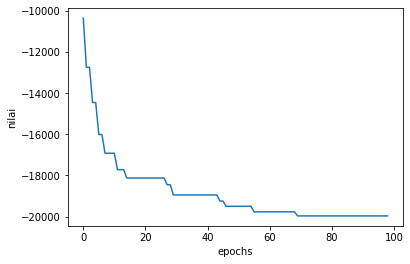

In [17]:
#             DIFFERENTIAL EVOLUTION DENGAN RASTRIGIN'S FUNCTION
# DIFFERENTIAL EVOLUTION ALGORITHM DENGAN RASTRIGIN'S FUNCTION#

import numpy as np
import random
import matplotlib.pyplot as plt

#INISIALISASI PARAMETER
D = 10 # D = ukuran dimensi
epochs = 99
ukuranPopulasi = 10 # N = populasi /ukuranPopulasi
BU = 5.12 #boundary high (UB)
BL = -5.12 #boundary low (LB)
CR = 0.9 #crossover, makin besar nilai maka kemungkinan crossover lebih tinggi
F = 0.5

#INISIALISASI POPULASI
induk = np.empty([ukuranPopulasi,D])
for i in range(ukuranPopulasi):
    for j in range(D):
        induk[i][j] = random.random()*(BU-BL)+BL
print("INDUK AWAL SEKALI ADALAH:",induk)


#FUNGSI OBJEKTIF  
def fungsiObjektif(induk):
    matrix = induk.shape
    ukuranPopulasi = matrix[0]
    jumlahIndividu = matrix[1]
    Fobj = np.empty(ukuranPopulasi)
    for i in range(ukuranPopulasi):
        d = 0
        for j in range(jumlahIndividu):
            d+=(d+induk[i][j]**2)-(10*np.cos(2*np.pi*d+induk[i][j])+10)
        Fobj[i] = d
    return Fobj
print(fungsiObjektif(induk))


#CROSSOVER
def crossover(induk,fungsiObjektif, j):
    matrix = induk.shape
    ukuranPopulasi = matrix[0]
    jumlahIndividu = matrix[1]
    random1 = random.randint(0,ukuranPopulasi-1)
    random2 = random.randint(0,ukuranPopulasi-1)
    random3 = random.randint(0,ukuranPopulasi-1)
    while random1 == random2:
        random2 = (random2+1)%ukuranPopulasi
    while random3 == random1 or random3 == random2:
        random3 = (random3+1)%ukuranPopulasi
    hasilCrossover = induk[random3][j] + F*(induk[random1][j] - induk[random2][j])
    return hasilCrossover
hasilCrossover = crossover(induk,fungsiObjektif, 1)
print(hasilCrossover)

print("induk awal: \n", induk)
print("hasil sphere: \n", fungsiObjektif(induk))
print("hasil crossover: \n", hasilCrossover)

x = np.empty((1, D))
objektif = fungsiObjektif(induk)
rastriginTerbaik = np.empty(epochs)
rastriginTerbaik[0] = objektif.min()
for loop in range(epochs):
    for i in range(ukuranPopulasi):
        for j in range(D):
            x[0][j] = induk[i][j]
        jrand = random.randint(0,D)

        for j in range(D):
            if random.random() < CR or j == jrand:
                crossbaru = crossover(induk, F, j)
                x[0][j] = crossbaru

        #replace
        objx = fungsiObjektif(x)
        if objx < objektif[i]:
            objektif[i] = objx
            for j in range(D):
                induk[i][j] = x[0][j]
    rastriginTerbaik[loop] = objektif.min()
    print("nilai iterasi ke-", loop+1, ": ", rastriginTerbaik[loop])
print(rastriginTerbaik)


#PLOT
plt.plot(rastriginTerbaik)
plt.xlabel('epochs')
plt.ylabel('nilai')
plt.show()


## GRAFIK PERBANDINGAN GENETIC ALGORITHM DAN DIFFERENTIAL EVOLUTION DENGAN RASTRIGIN'S FUNCTION

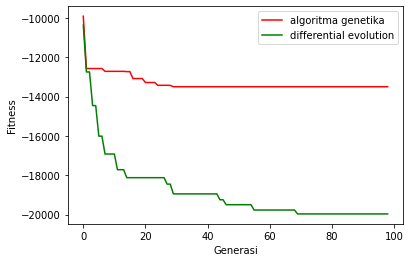

In [18]:
#menggabungkan plot sphere dan listFitnessTerbaik, plot sphere berwarna merah dan listFitnessTerbaik berwarna hijau, dengan label sphere dan listFitnessTerbaik
plt.plot(listFitnessTerbaik,color='red',label='algoritma genetika')
plt.plot(rastriginTerbaik,color='green',label='differential evolution')

plt.xlabel('Generasi')
plt.ylabel('Fitness')
plt.legend()

## DIFFERENTIAL EVOLUTION DENGAN RASTRIGIN'S FUNCTION 30X RUN

In [21]:
#             DIFFERENTIAL EVOLUTION DENGAN RASTRIGIN'S FUNCTION
# DIFFERENTIAL EVOLUTION DENGAN RASTRIGIN'S FUNCTION#
#run 30 kali, cari nilai terbaik, tentukan mean, stdev, dan min

import numpy as np
import random
import matplotlib.pyplot as plt

#INISIALISASI PARAMETER
D = 10 # D = ukuran dimensi
epochs = 99
ukuranPopulasi = 10 # N = populasi /ukuranPopulasi
BU = 5.12 #boundary high (UB)
BL = -5.12 #boundary low (LB)
CR = 0.9 #crossover, makin besar nilai maka kemungkinan crossover lebih tinggi
F = 0.5
jumlahRun = 30
listrastriginterbaik = []

for a in range(jumlahRun):
    #INISIALISASI POPULASI
    induk = np.empty([ukuranPopulasi,D])
    for i in range(ukuranPopulasi):
        for j in range(D):
            induk[i][j] = random.random()*(BU-BL)+BL
    print("INDUK AWAL SEKALI ADALAH:",induk)

    #FUNGSI SPHERE  
    def fungsiObjektif(induk):
        matrix = induk.shape
        ukuranPopulasi = matrix[0]
        jumlahIndividu = matrix[1]
        Fobj = np.empty(ukuranPopulasi)
        for i in range(ukuranPopulasi):
            d = 0
            for j in range(jumlahIndividu):
                d+=(d+induk[i][j]**2)-(10*np.cos(2*np.pi*d+induk[i][j])+10)
            Fobj[i] = d
        return Fobj
    print(fungsiObjektif(induk))

    #CROSSOVER
    def crossover(induk,fungsiObjektif, j):
        matrix = induk.shape
        ukuranPopulasi = matrix[0]
        jumlahIndividu = matrix[1]
        random1 = random.randint(0,ukuranPopulasi-1)
        random2 = random.randint(0,ukuranPopulasi-1)
        random3 = random.randint(0,ukuranPopulasi-1)

        while random1 == random2:
            random2 = (random2+1)%ukuranPopulasi
        while random3 == random1 or random3 == random2:
            random3 = (random3+1)%ukuranPopulasi
        hasilCrossover = induk[random3][j] + F*(induk[random1][j] - induk[random2][j])
        return hasilCrossover
    hasilCrossover = crossover(induk,fungsiObjektif, 1)
    print(hasilCrossover)

    print("induk awal: \n", induk)
    print("hasil rastrigin: \n", fungsiObjektif(induk))
    print("hasil crossover: \n", hasilCrossover)

    x = np.empty((1, D))
    objektif = fungsiObjektif(induk)
    rastriginTerbaik = np.empty(epochs)
    rastriginTerbaik[0] = objektif.min()

    for loop in range(epochs):
        for i in range(ukuranPopulasi):
            for j in range(D):
                x[0][j] = induk[i][j]
            jrand = random.randint(0,D)

            for j in range(D):
                if random.random() < CR or j == jrand:
                    crossbaru = crossover(induk, F, j)
                    x[0][j] = crossbaru

            #replace
            objx = fungsiObjektif(x)
            if objx < objektif[i]:
                objektif[i] = objx
                for j in range(D):
                    induk[i][j] = x[0][j]
        rastriginTerbaik[loop] = objektif.min()
    print("run ke-:",a)
    print("rastrigin terbaik ke ", a)
    print(rastriginTerbaik)
    listrastriginterbaik.append(np.min(rastriginTerbaik))
print(listrastriginterbaik)
        



INDUK AWAL SEKALI ADALAH: [[ 2.76238269  2.3528164   2.96923642 -4.79208536  1.97682248 -4.52131935
  -4.65937272  2.24942127 -3.99783717  3.62440085]
 [ 0.26601616 -2.55884248 -1.10578772  5.10090465  3.88653048 -3.0838073
   1.46672288  2.5140278   3.4049662  -1.15858859]
 [ 4.92680539 -4.04816487 -3.7423436  -1.69052722  2.93174924 -3.98759935
  -1.34991805 -2.05455881  0.77014409 -3.63519649]
 [-2.93990272 -0.8133255   4.40282153 -0.26528349 -3.93569506  2.00573394
   3.492633    3.3108203   0.29210939  5.00251767]
 [-0.94082384 -4.32539432 -0.55321549  3.24973785  4.86662951 -1.07487517
   0.54038525 -3.61609994  2.18787688 -5.11651063]
 [-1.59717357  1.16738331  5.10728849  2.88651366 -0.96167426 -1.05439345
  -3.8875676  -5.06046488  3.5663697   3.09634591]
 [-2.92716471  1.06824058  4.00962601 -3.05608724 -0.10369995 -1.52834922
  -4.98591545  0.39043123 -4.8851339  -0.30663314]
 [-1.49064182  1.68721631  0.52742888  0.55474956  2.31725766  3.67075534
   4.04197006  0.95449011 

## HASIL MEAN, STDEV, MIN DARI 30X RUN DIFFERENTIAL EVOLUTION DENGAN RASTRIGIN'S FUNCTION

In [23]:
print("30 kali run -DIFFERENTIAL EVOLUTION ALGORITHM DENGAN RASTRIGIN'S FUNCTION-")
#membuat looping sejumlah list rastrigin terbaik
for i in range(len(listrastriginterbaik)):
    print(i+1, ".   :", listrastriginterbaik[i])

#mencari mean dari list rastrigin terbaik
mean = np.mean(listrastriginterbaik, axis=0)
print("mean DE RASTRIGIN'S function:", mean)

#mencari stdev dari list rastrigin terbaik
stdev = np.std(listrastriginterbaik, axis=0)
print("stdev DE RASTRIGIN'S function:", stdev)

#mencari min dari list rastrigin terbaik
min = np.min(listrastriginterbaik, axis=0)
print("min DE RASTRIGIN'S function:", min)

30 kali run -DIFFERENTIAL EVOLUTION ALGORITHM DENGAN RASTRIGIN'S FUNCTION-
1 .   : -19853.363202314707
2 .   : -20132.18683872344
3 .   : -20037.400279615107
4 .   : -19797.176690374617
5 .   : -19942.684497903825
6 .   : -19867.20876327081
7 .   : -20103.273304650203
8 .   : -19929.172938988606
9 .   : -20047.645591903325
10 .   : -19999.72985640372
11 .   : -19340.08047674391
12 .   : -19967.736865214792
13 .   : -19678.37368608242
14 .   : -19393.577723326678
15 .   : -19655.310394033524
16 .   : -19348.98574843025
17 .   : -20216.208463525007
18 .   : -19531.476126127724
19 .   : -19950.116029479475
20 .   : -20065.840826389915
21 .   : -19940.193458118025
22 .   : -20020.4043503661
23 .   : -19943.476676474136
24 .   : -20202.799320018406
25 .   : -19857.976072120604
26 .   : -19941.262535033955
27 .   : -19481.539205138666
28 .   : -19307.636417630478
29 .   : -19869.976583658052
30 .   : -20115.94191391266
mean DE RASTRIGIN'S function: -19851.29182786577
stdev DE RASTRIGIN'S fun

## GENETIC ALGORITHM DENGAN RASTRIGIN'S FUNCTION 30X RUN

In [24]:
#             GENETIC ALGORITHM DENGAN RASTRIGIN'S FUNCTION
# GENETIC ALGORITHM DENGAN RASTRIGIN'S FUNCTION#
#run 30 kali, cari nilai terbaik, tentukan mean, stdev, dan min

import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from array import *

#INISIALISASI PARAMETER
D=10 # D = ukuran dimensi
maxit=99
ukuranPopulasi=10
LB= -5.12
UB= 5.12
F=  0.5
CR = 0.9
listFitJmlRun = []
jumlahRun = 30

for a in range(jumlahRun):
      def initPopulasi(ukuranPopulasi,D,UB,LB):
        P=np.empty((ukuranPopulasi,D))
        for i in range(ukuranPopulasi):
          for j in range(D):
            P[i][j]=(random.random()*(UB-LB))+LB
        return P
      P= initPopulasi(ukuranPopulasi,D,UB,LB)
      print(P)

      #objektif
      def fungsiObjektif(populasi):
        sz=populasi.shape
        ukuranPopulasi=sz[0]
        dimensi=sz[1]
        Fobj=np.empty(ukuranPopulasi)
        for i in range(ukuranPopulasi):
          d=0
          for j in range(dimensi):
            d+=(d+populasi[i][j]**2)-(10*np.cos(2*np.pi*d+populasi[i][j])+10)
          Fobj[i]=d
        return Fobj
      Fobj = fungsiObjektif(P)
      print(Fobj)

      #seleksi
      def seleksi (P,fsObj):
        jmlInduk = 10
        sz = P.shape
        ukuranPopulasi = sz[0]
        dimensi = sz[1]
        Induk = np.empty((jmlInduk,dimensi))
        Induk = Induk.astype('int')
        
        for i in range (10):
          # memilih dua individu secara acak 
          r1 = random.randint(0,ukuranPopulasi-1)
          r2 = random.randint(0,ukuranPopulasi-1)
          if  fsObj[r1] < fsObj [r2]:
            for j in range(dimensi):
              Induk [i][j] = P[r1][j]
          else:
            for j in range(dimensi):
              Induk [i][j] = P[r2][j]
        return Induk
      Induk = seleksi(P,Fobj)
      print(Induk)

      #crossover 
      def PMX(Induk):
        sz = Induk.shape
        brs = sz[0]
        kol = sz[1]
        Anak = np.empty((2,kol))
        Anak = Anak.astype('int')
        r1 = random.randint(1,kol-2)

        for i0 in range(r1):
          Anak [0][i0] = Induk[0][i0]
          Anak [1][i0] = Induk[1][i0]
        
        batasCek1 = r1
        batasCek2 = r1

        for i in range(kol):
          m = (i+r1)%kol
          n1 = Induk[0][i] 
          n2 = Induk[1][i]

          #mengecek apakah kota tertentu sudah ada di anak
          idxAda1 = 0
          idxAda2 = 0
          for j1 in range(batasCek1): 
            if batasCek1>(kol-1):
              idxAda1 = 1
            if Anak [0][j1] ==n2: 
              idxAda1 = 1
                  
          for j2 in range(batasCek2): 
            if batasCek2>(kol-1):
              idxAda2 = 1
            if Anak [1][i0]  == n1: 
              idxAda2 = 1

          if idxAda1 == 0:
            Anak[0][batasCek1] = n2
            batasCek1 = batasCek1 +1
        
          if idxAda2 == 0:
            Anak[1][batasCek2] = n1
            batasCek2 = batasCek2 +1
        return Anak
      AnakCX = PMX(Induk)
      print("Anak :",AnakCX)

      #mutasi swap
      def MutasiSwap(Induk):
        sz = Induk.shape
        brs = sz[0]
        kol = sz[1]
        Anak = np.empty((2,kol))
        Anak = Anak.astype('int')
        Anak = Induk
        r1 = random.randint(0,kol-1)
        r2 = random.randint(0,kol-1)

        while r1 == r2:
          r2 = random.randint(0,kol-1)

        I1rs1 = Induk [0][r1]
        I1rs2 = Induk [0][r2]
        I2rs1 = Induk [1][r1]
        I2rs2 = Induk [1][r2] 
        Anak [0][r1] = I1rs2
        Anak [0][r2] = I1rs1
        Anak [1][r1] = I2rs2  
        Anak [1][r2] = I2rs1
        return Anak

      print("AnakCX :",AnakCX)
      AnakM = MutasiSwap(AnakCX)
      print("AnakM :",AnakM)

      #etilism
      def Elitism(P,Anak,Fobj,fitAnak):
        szP = P.shape
        brsP = szP[0]
        kolP = szP[1]
        szA = Anak.shape
        brsA = szA[0]
        kolA = szA[1]

        for i in range(brsA):
          iJelek = Fobj.max()
          idxJelek = Fobj.argmax()
          if fitAnak[i]<iJelek:
            Fobj[idxJelek] = fitAnak[i]
            for j in range (kolP):
              P[idxJelek][j] = Anak[i][j]
        return [P,Fobj]

      fitAnak= fungsiObjektif(AnakM)
      print(P)
      print(AnakM)
      print(Fobj)
      print(fitAnak)
      P = Elitism (P,AnakM,Fobj,fitAnak)
      print(P)
      print(Fobj)


      #inisialisasi parameter
      PCX = 0.9
      Pm = 0.01

      # Inisialisasi populasi 
      P = initPopulasi(ukuranPopulasi,D,UB,LB)
      
      #melakukan evaluasi P
      Fobj = fungsiObjektif(P)
      print("fitness populasi awal:",Fobj)
      print("fitness terbaik awal:",Fobj.min())
      print("rute awal :",P[Fobj.argmin()])
      listFitnessTerbaik = []

      for i in range(maxit):
        print("generasi :",i)
        Induk = seleksi(P,Fobj)
        print("Induk :",Induk)
        Anak = Induk
        rxo = random.random()

        if rxo < PCX:
          Anak = PMX(Induk)
          rm = random.random()
          if rm < Pm:
            Anak = MutasiSwap(Anak)

        fitAnak = fungsiObjektif(Anak)
        print("fitness Anak ke-:",i, "=",fitAnak)
        [P, Fobj]= Elitism (P,Anak,Fobj,fitAnak)   
        listFitnessTerbaik.append(Fobj.min())
        
      print("fitness populasi akhir:",Fobj)
      print("fitness akhir:",Fobj.min())
      print("rute akhir :",P[Fobj.argmin()])
      print("list fitness terbaik:",listFitnessTerbaik)
      listFitJmlRun.append(np.min(listFitnessTerbaik))
print("list fitness jumlah run:",listFitJmlRun)


[[ 4.66625191  0.25148795  3.58408639 -2.73927574  3.30522984 -3.92505106
   0.0357755  -2.25377024  1.90661562  0.5035405 ]
 [-2.89247156 -4.30066599  1.94160981  2.11392213 -0.72451635  4.02209505
   0.58352206  4.98372831 -2.32342621 -0.15421011]
 [ 0.49882823 -1.51408923 -0.77671165 -3.47142039  2.69441207 -0.46389508
   0.27801993 -0.37422179 -0.81091945 -0.97350958]
 [-4.39639501 -2.43640742 -4.39542254  2.60411691  3.50445531 -4.74076924
  -2.90309946 -0.36658338  2.35525156 -3.46246302]
 [-3.50099524 -0.04829963  0.44857973 -3.35228184  3.60227757 -0.5161855
   4.17291293  4.03336508 -4.79199979  4.53717673]
 [-3.1058631   4.29009659  0.74779479  3.84761827 -3.33635993 -3.43123539
  -3.28481354 -3.69751716  0.23254723  4.16900291]
 [ 1.06530309 -3.99051643 -0.94538503 -3.5719646  -4.81249141  2.19863548
  -0.62128431 -3.00545958  1.78860967 -3.11011192]
 [ 3.97881024  1.55030266 -1.23935399  2.74855433 -5.05445855  2.91175365
   3.94232022  3.21568085 -2.95329646 -4.24860655]
 

## HASIL MEAN, STDEV, MIN DARI 30X RUN GENETIC ALGORITHM DENGAN RASTRIGIN'S FUNCTION

In [24]:
print("30 kali run -GENETIC ALGORITHM DENGAN RASTRIGIN'S FUNCTION-")
#membuat looping sejumlah list rastrigin terbaik
for i in range(len(listFitJmlRun)):
    print(i+1, ".   :", listFitJmlRun[i])

#mencari mean dari list rastrigin terbaik
mean = np.mean(listFitJmlRun, axis=0)
print("mean GA RASTRIGIN'S function:", mean)

#mencari stdev dari list rastrigin terbaik
stdev = np.std(listFitJmlRun, axis=0)
print("stdev GA RASTRIGIN'S function:", stdev)

#mencari min dari list rastrigin terbaik
min = np.min(listFitJmlRun, axis=0)
print("min GA RASTRIGIN'S function:", min)

30 kali run -GENETIC ALGORITHM DENGAN RASTRIGIN'S FUNCTION-
1 .   : 20.0
2 .   : 105.0
3 .   : 20.0
4 .   : 70.0
5 .   : 185.0
6 .   : 8.0
7 .   : 36.0
8 .   : 93.0
9 .   : 103.0
10 .   : 9.0
11 .   : 163.0
12 .   : 220.0
13 .   : 27.0
14 .   : 60.0
15 .   : 125.0
16 .   : 87.0
17 .   : 101.0
18 .   : 8.0
19 .   : 64.0
20 .   : 11.0
21 .   : 72.0
22 .   : 66.0
23 .   : 185.0
24 .   : 55.0
25 .   : 63.0
26 .   : 133.0
27 .   : 20.0
28 .   : 13.0
29 .   : 21.0
30 .   : 23.0
mean GA RASTRIGIN'S function: 72.2
stdev GA RASTRIGIN'S function: 58.37373838750893
min GA RASTRIGIN'S function: 8.0


========AKHIR DARI GENETIC ALGORITHM DAN DIFFERENTIAL EVOLUTION DENGAN RASTRIGIN'S FUNCTION========================